### 1. Librerias

In [1]:
import pandas as pd
import numpy as np

### 2. Carga de datos

In [2]:
ruta = 'C:/Users/Daniel/Documents/proyectos/riesgos/one year pd/chap2oneypd.csv'

In [3]:
df = pd.read_csv(ruta)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25906 entries, 0 to 25905
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             25906 non-null  int64  
 1   vintage_year                   25906 non-null  int64  
 2   monthly_installment            25906 non-null  float64
 3   loan_balance                   25906 non-null  float64
 4   bureau_score                   25473 non-null  float64
 5   num_bankrupt_iva               25473 non-null  float64
 6   time_since_bankrupt            25473 non-null  float64
 7   num_ccj                        25473 non-null  float64
 8   time_since_ccj                 25473 non-null  float64
 9   ccj_amount                     25473 non-null  float64
 10  num_bankrupt                   25473 non-null  float64
 11  num_iva                        25473 non-null  float64
 12  min_months_since_bankrupt      25473 non-null 

### 3. Limpieza y tratamiento de datos

In [5]:
df['max_arrears_12m'] = df['max_arrears_12m'].round(4)
df['arrears_months'] = df['arrears_months'].round(4)

In [6]:
# armar una función con lambda para que haga el cambio en todas las columnas que tengan 'date' en su nombre
from datetime import datetime
df['origination_date2'] = pd.to_datetime(df['origination_date'])
df['origination_date2'] = df['origination_date2'].dt.strftime('%Y-%m-%d')

df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
df['maturity_date2'] = df['maturity_date2'].dt.strftime('%Y-%m-%d')

df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])
df['recent_arrears_date2'] = df['recent_arrears_date2'].dt.strftime('%Y-%m-%d')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8420\2291711405.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['origination_date2'] = pd.to_datetime(df['origination_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8420\2291711405.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8420\2291711405.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])


#### 3.1 Identificación de 'NaN'

In [7]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran 
# eliminación de los registros con nan de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt

df.isna().sum().to_frame()


,0
id,0
vintage_year,0
monthly_installment,0
loan_balance,0
bureau_score,433
num_bankrupt_iva,433
time_since_bankrupt,433
num_ccj,433
time_since_ccj,433
ccj_amount,433


In [8]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran dentro del análisis
df2 = df.drop(['recent_arrears_date','months_since_2mia','recent_arrears_date2'],axis=1)

In [9]:
# eliminación los registros con 'nan' de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt
df2 = df2[(df2.bureau_score.notna())].reset_index(drop=True)

In [10]:
# eliminación los registros con 'nan' de la variable avg_mia_6m,max_arrears_bal_6m,max_mia_6m,avg_bal_6m,avg_bureau_score_6m 
df2 = df2[(df2.avg_bureau_score_6m.notna())].reset_index(drop=True)

In [11]:
# eliminación los registros con 'nan' de la variable region
df2 = df2[(df2.region.notna())].reset_index(drop=True)

In [12]:
# validación de la no exitencia de atributos 'NaN' dentro del dataframe
df2.isna().sum().to_frame()

,0
id,0
vintage_year,0
monthly_installment,0
loan_balance,0
bureau_score,0
num_bankrupt_iva,0
time_since_bankrupt,0
num_ccj,0
time_since_ccj,0
ccj_amount,0


#### 3.1 Contrucción de marca de default (tgt) 

In [13]:
df2['default_event'] = np.where((df2.arrears_event == 1) | (df2.bankrupt_event == 1) | (df2.term_expiry_event == 1),1,0)

In [14]:
df2.default_event.value_counts(normalize = True)*100
# con dataframe df quitando registros con 'nan'
# %no evento 0 = 94.742531 
# %evento 1 = 5.257469
# nos damos cuenta que el dataframe se sncuentr desbalanceda en la variable objetivo (evento y no evento)

default_event
0    94.753583
1     5.246417
Name: proportion, dtype: float64

In [15]:
# unidad muestral
um   = ['id']
# target, marca de incumplimiento
tgt = ['default_event']

# varibles continuas
var_con= ['monthly_installment','loan_balance','bureau_score','time_since_bankrupt','time_since_ccj',
        'ccj_amount','min_months_since_bankrupt','ltv','arrears_months'
        ,'mob','remaining_mat','loan_term','max_arrears_12m','max_arrears_bal_6m','avg_bal_6m','avg_bureau_score_6m',
        'cc_util','annual_income','months_since_recent_cc_delinq'
        ]

# variables categoricas
var_cat = ['num_bankrupt_iva','num_ccj','num_bankrupt','num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
           'max_mia_6m','emp_length']

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

porcentaje de tgt:  5.246416650304339
porcentaje de no tgt:  94.75358334969566


Text(0.5, 1.0, 'conteo de casos de fraude')

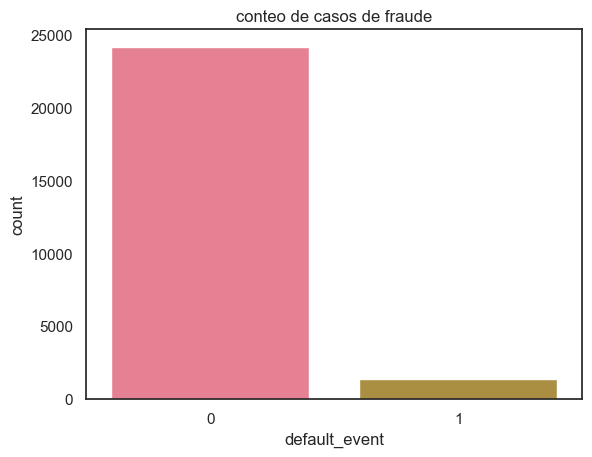

In [ ]:
# cases of default and non default
print('porcentaje de tgt: ',df2[tgt].value_counts()[1] /df2.shape[0] * 100)
print('porcentaje de no tgt: ',df2[tgt].value_counts()[0] /df2.shape[0] * 100)
sns.set_theme(style = 'white',palette = 'husl')
ax = sns.countplot(x = 'default_event' , data = df2)
ax.set_title('conteo de casos de fraude')

In [18]:
df2['num_bankrupt_iva'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: num_bankrupt_iva, dtype: float64

Text(0.5, 1.0, 'Cases of default and non default according with num_ccj')

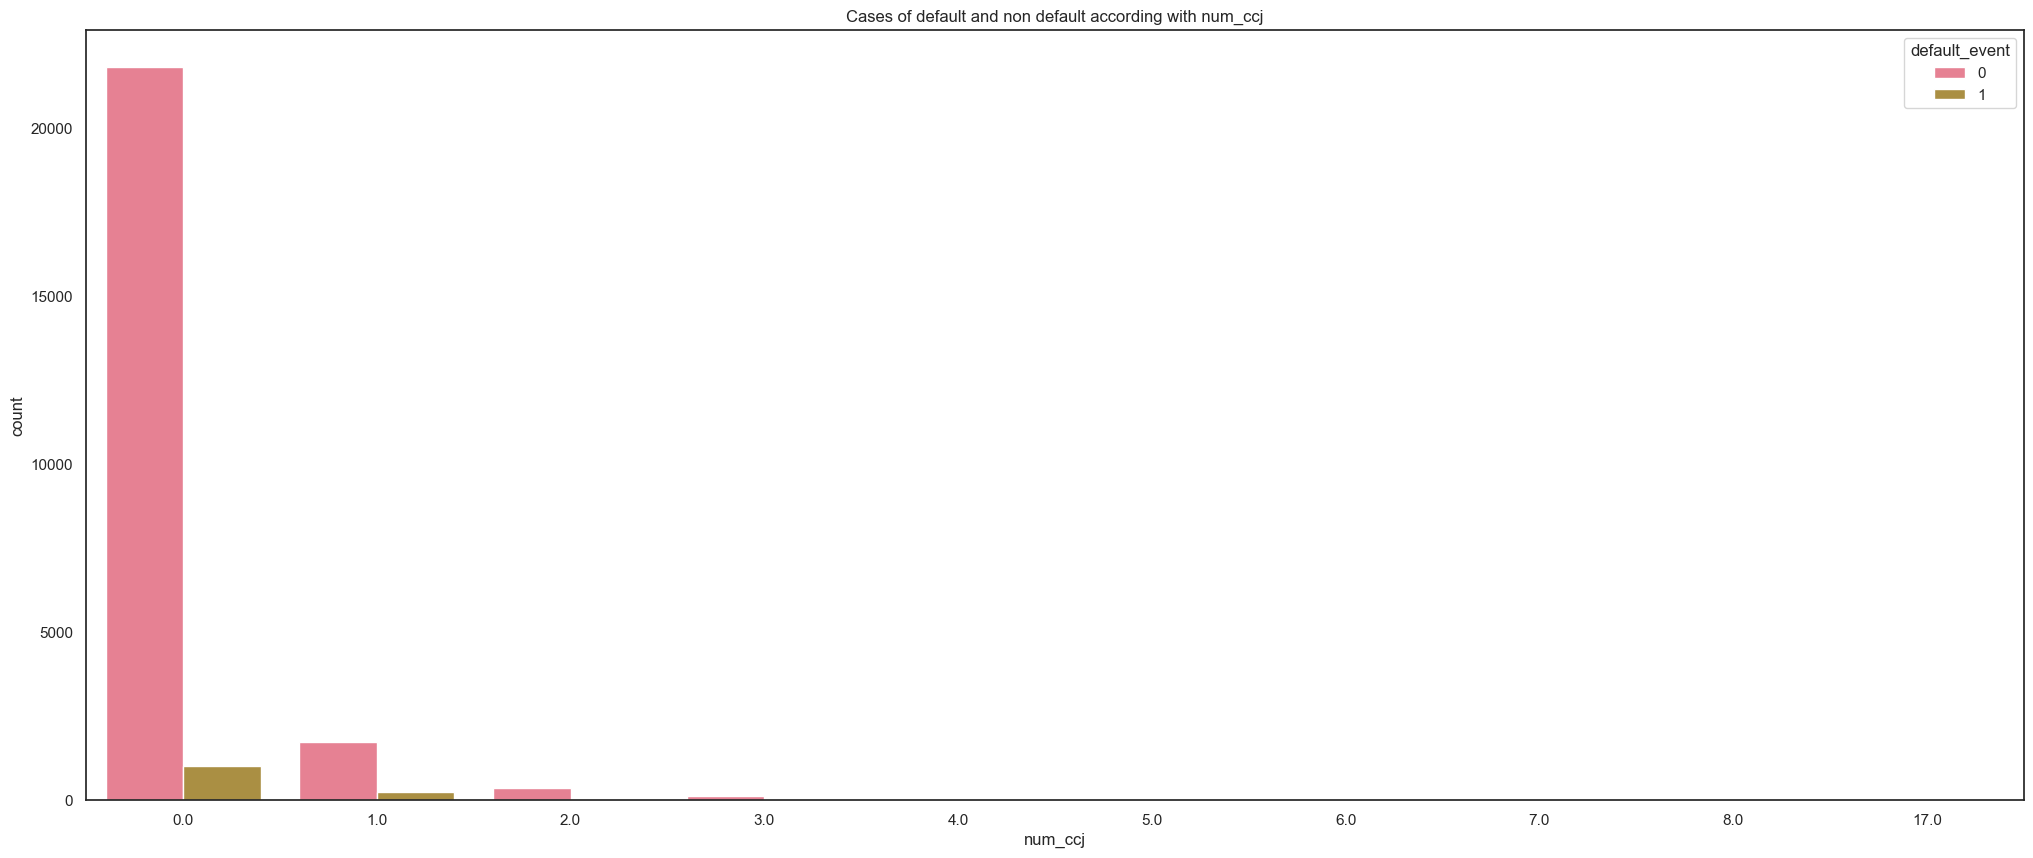

In [24]:
# Cases of default and non default , variable num_ccj
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_ccj)
plt.title('Cases of default and non default according with num_ccj')

Text(0.5, 1.0, 'Cases of default and non default according with num_bankrupt')

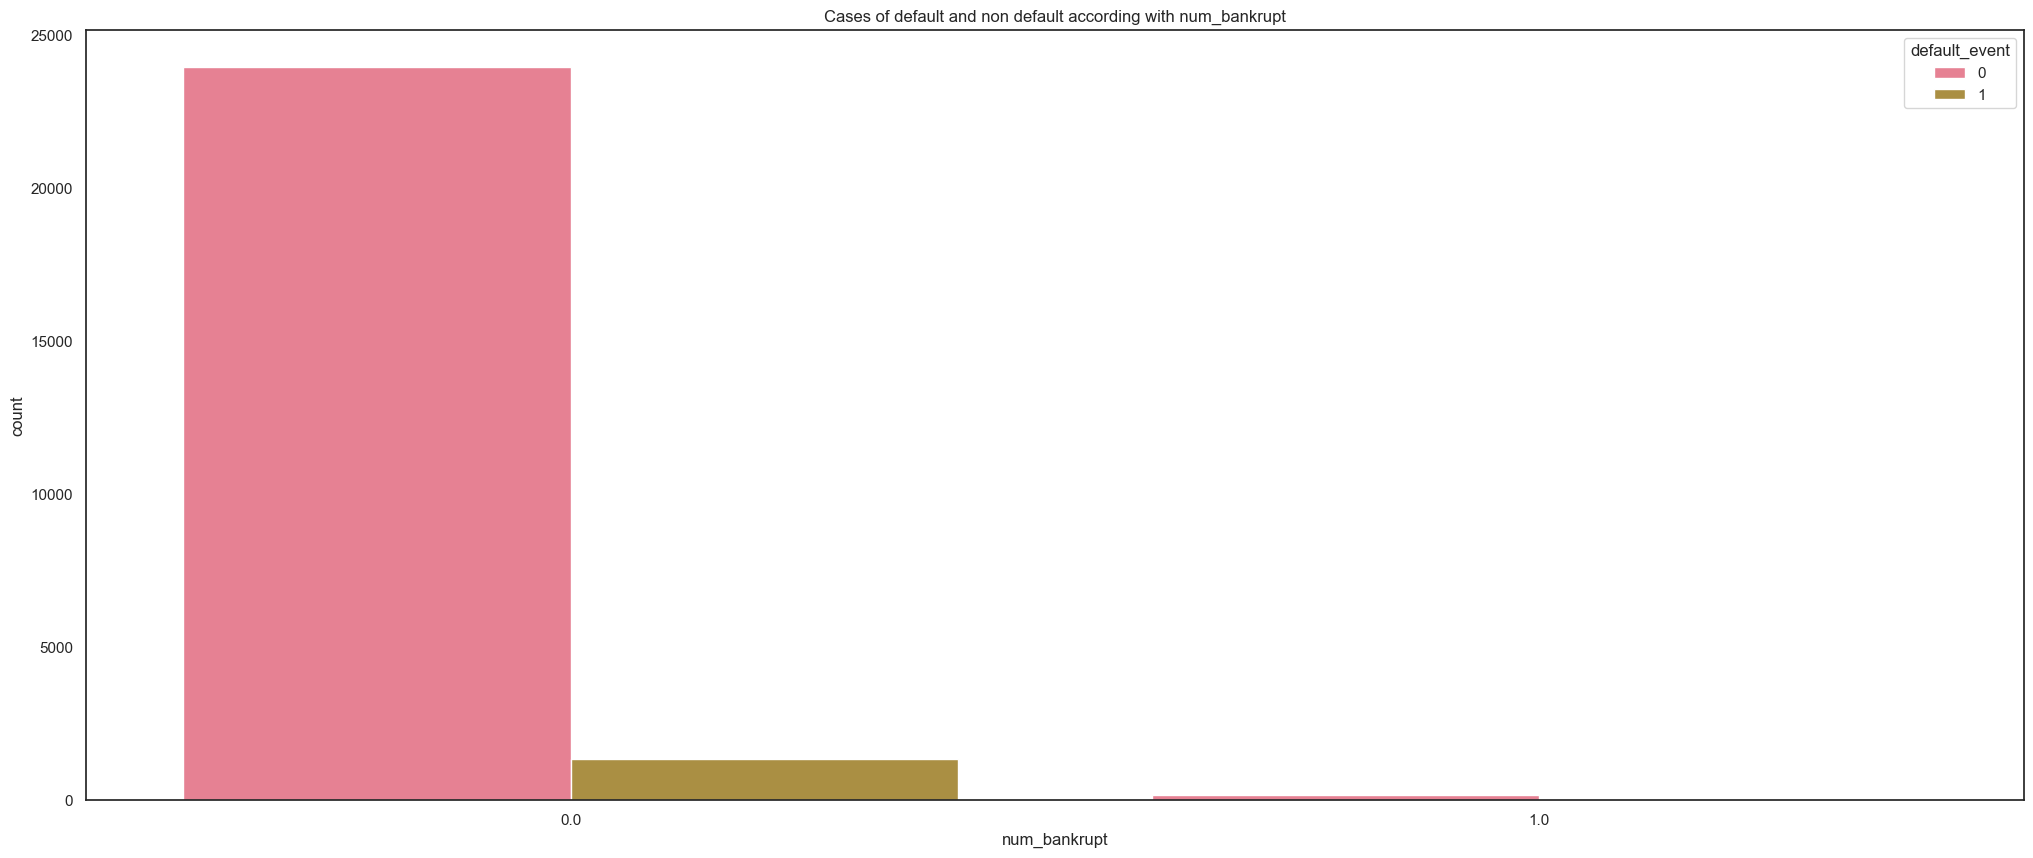

In [26]:
# Cases of default and non default , variable num_bankrupt
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_bankrupt)
plt.title('Cases of default and non default according with num_bankrupt')

Text(0.5, 1.0, 'Cases of default and non default according with num_iva')

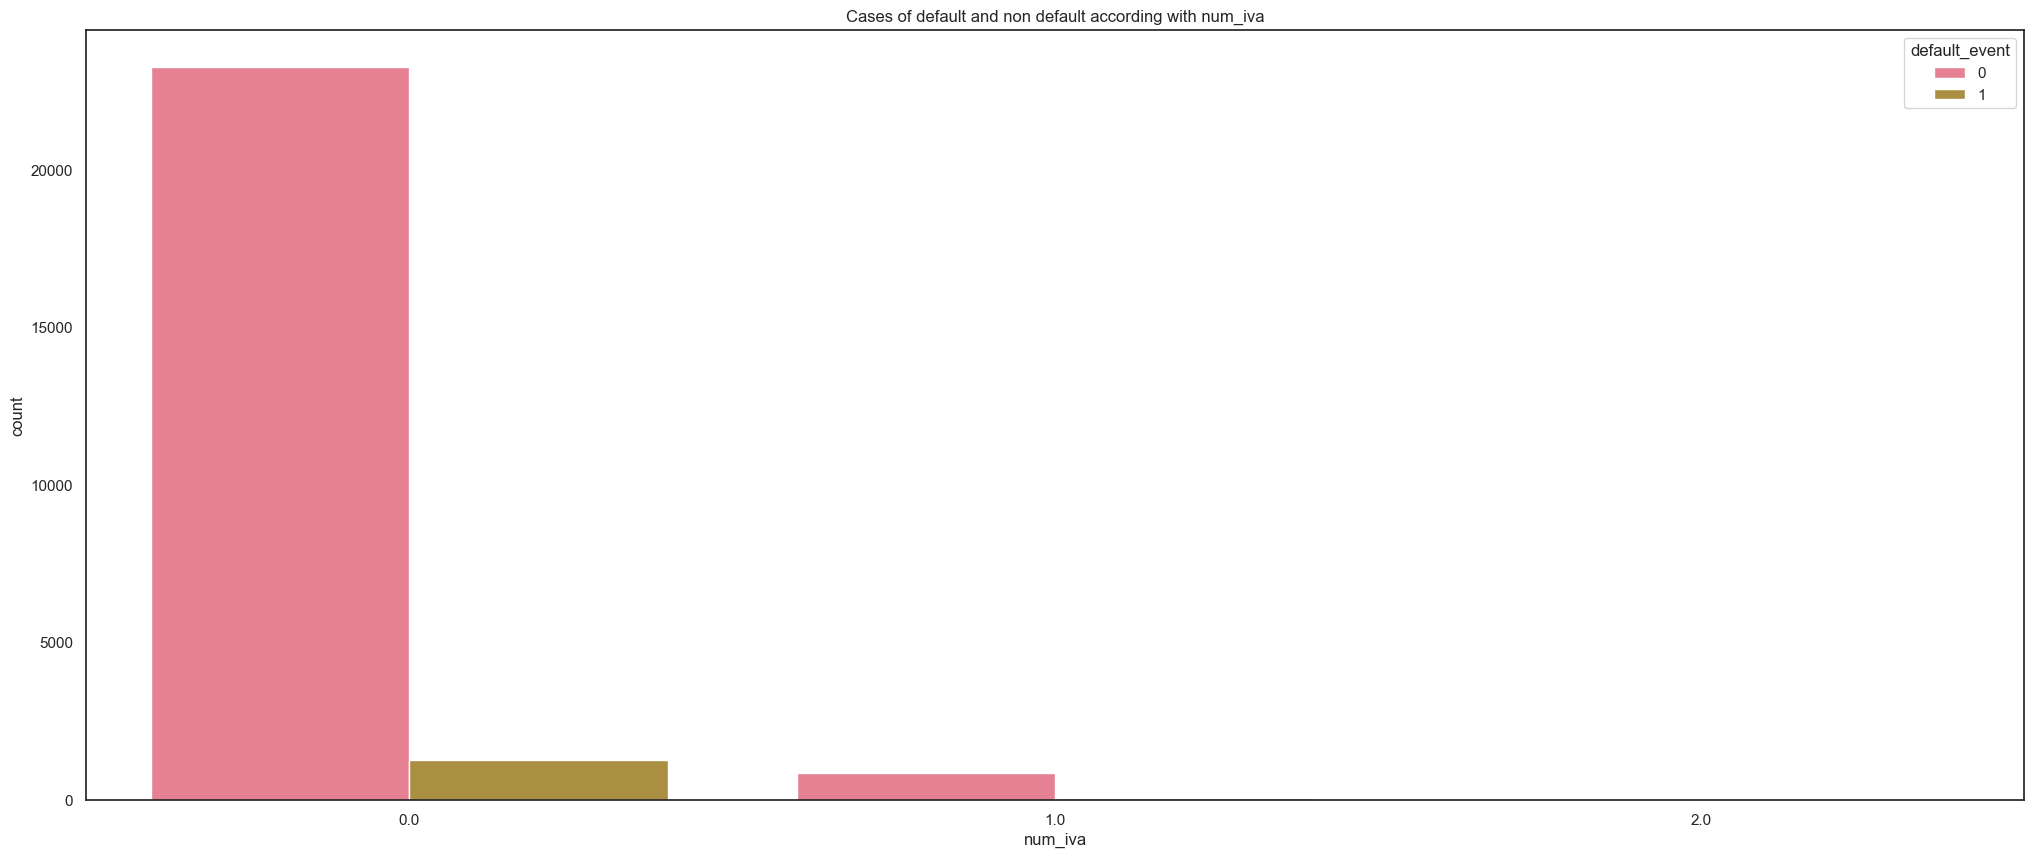

In [27]:
# Cases of default and non default , variable num_iva
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.num_iva)
plt.title('Cases of default and non default according with num_iva')

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with pl_flag')

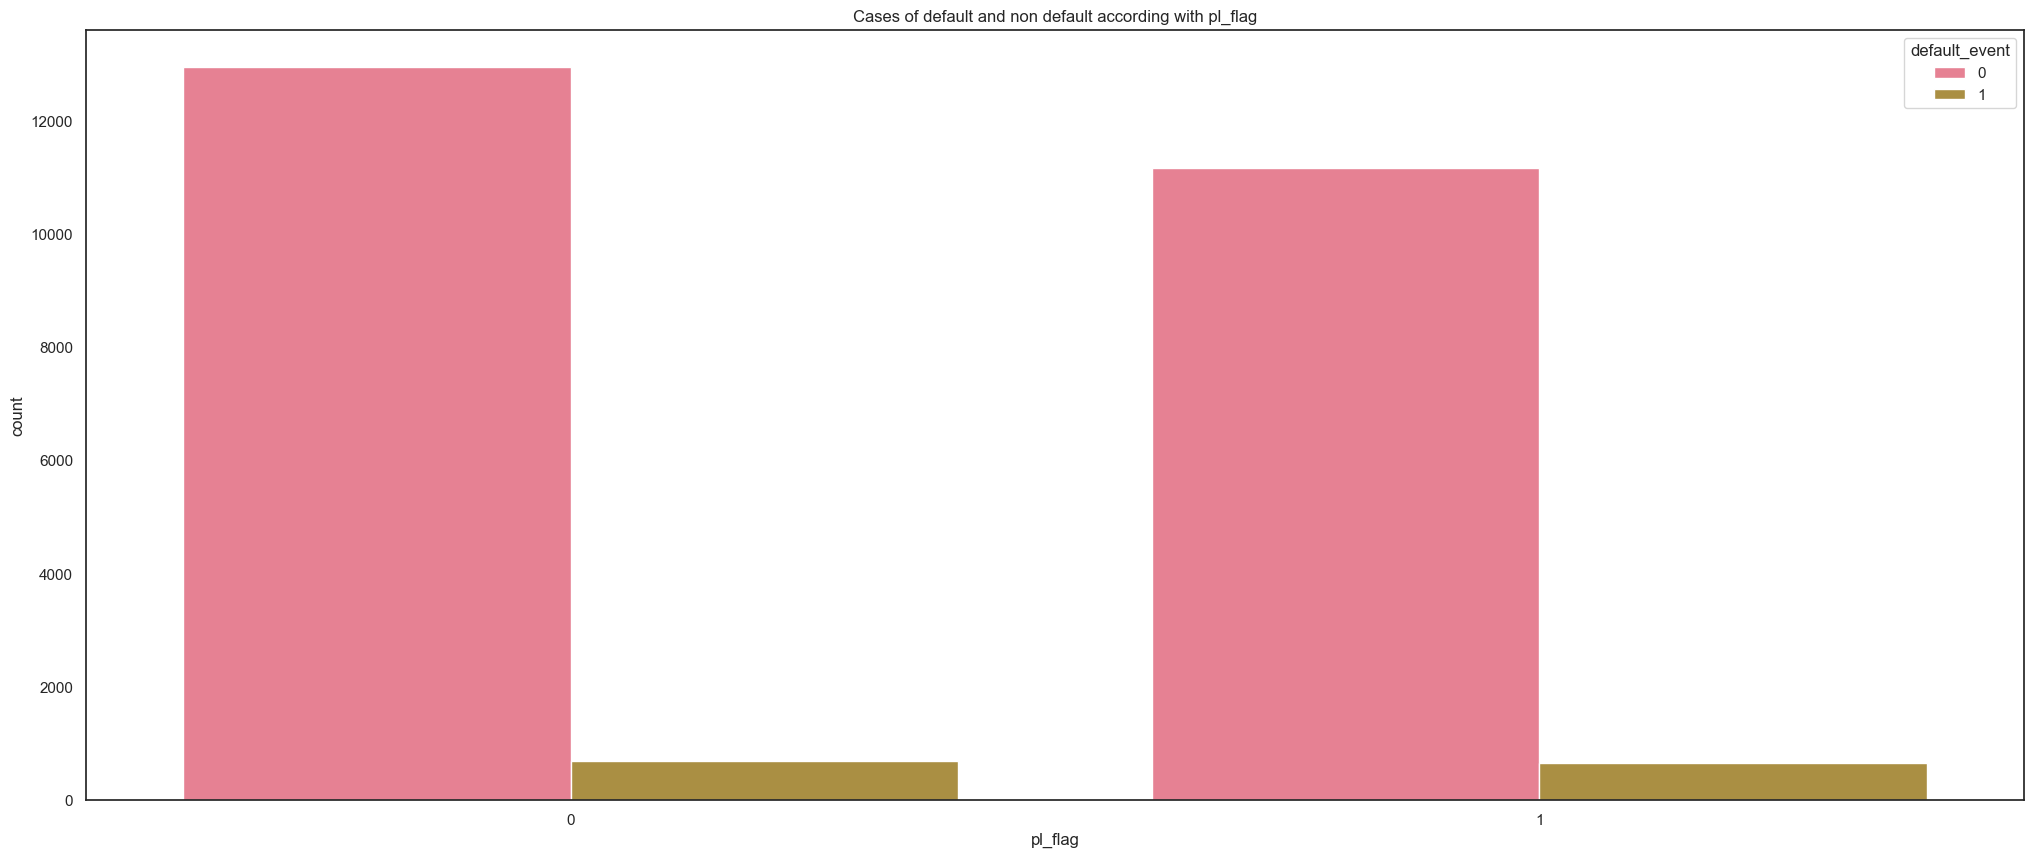

In [28]:
# Cases of default and non default , variable pl_flag
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.pl_flag)
plt.title('Cases of default and non default according with pl_flag')

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with region')

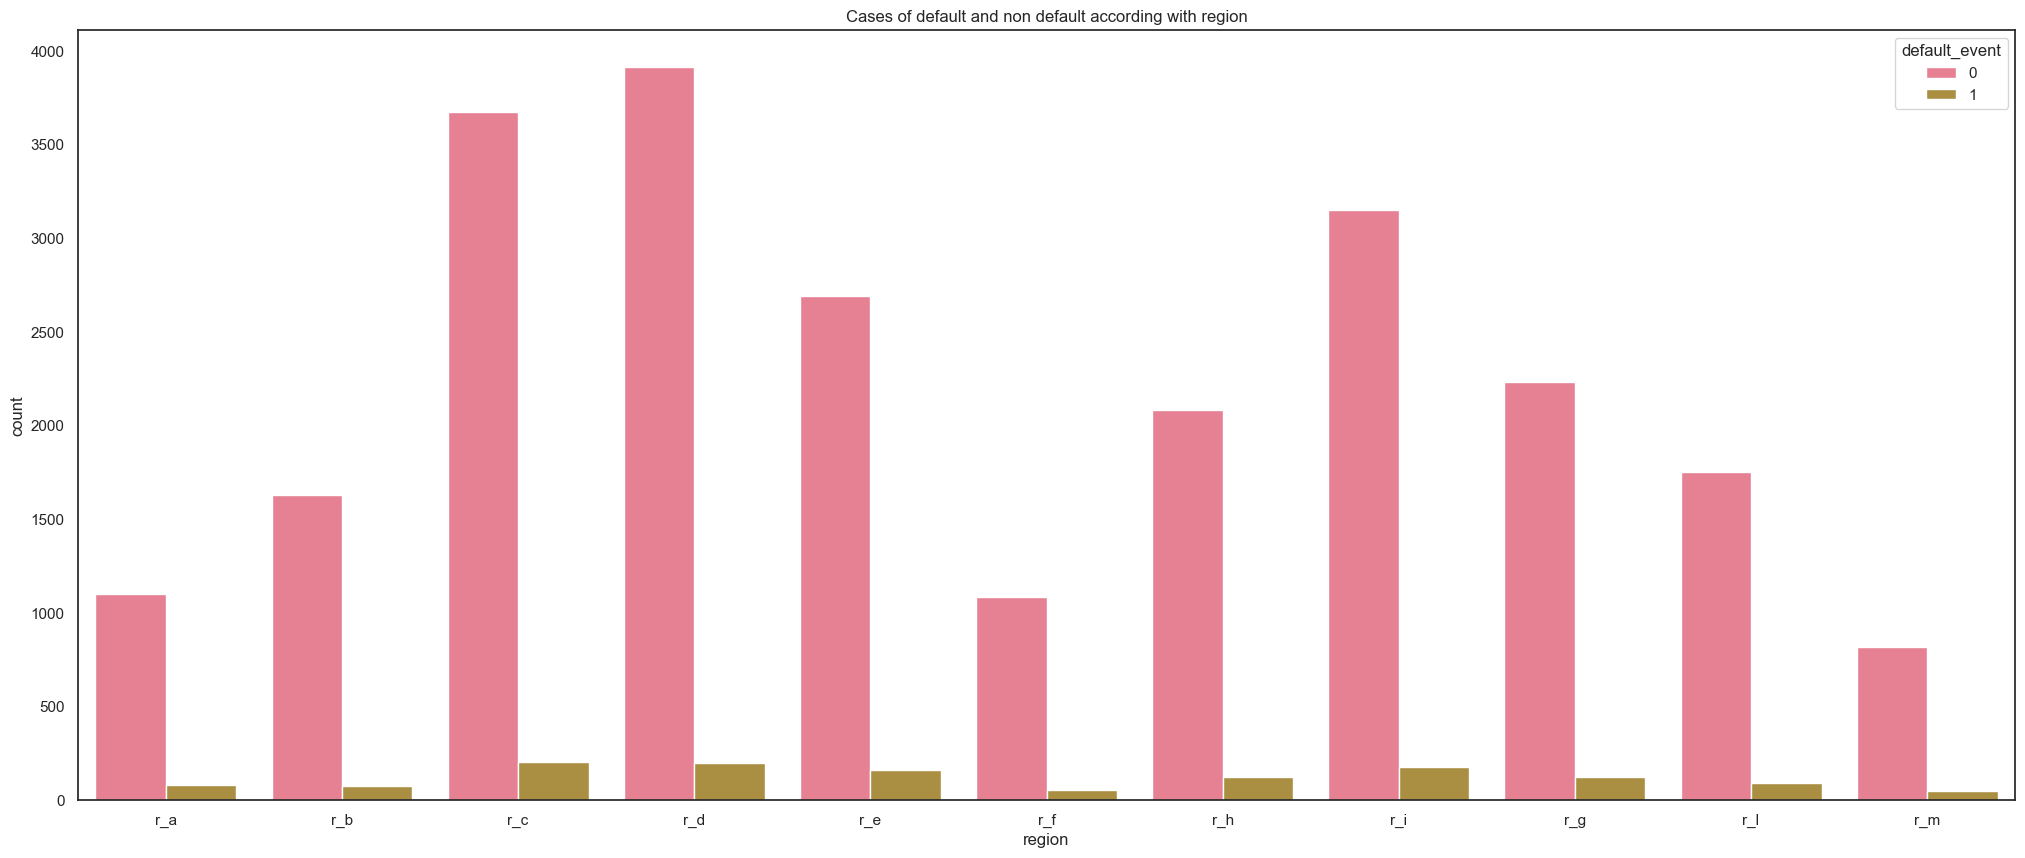

In [29]:
# Cases of default and non default , variable region
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.region)
plt.title('Cases of default and non default according with region')

## ok pl_flag, region

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with repayment_type')

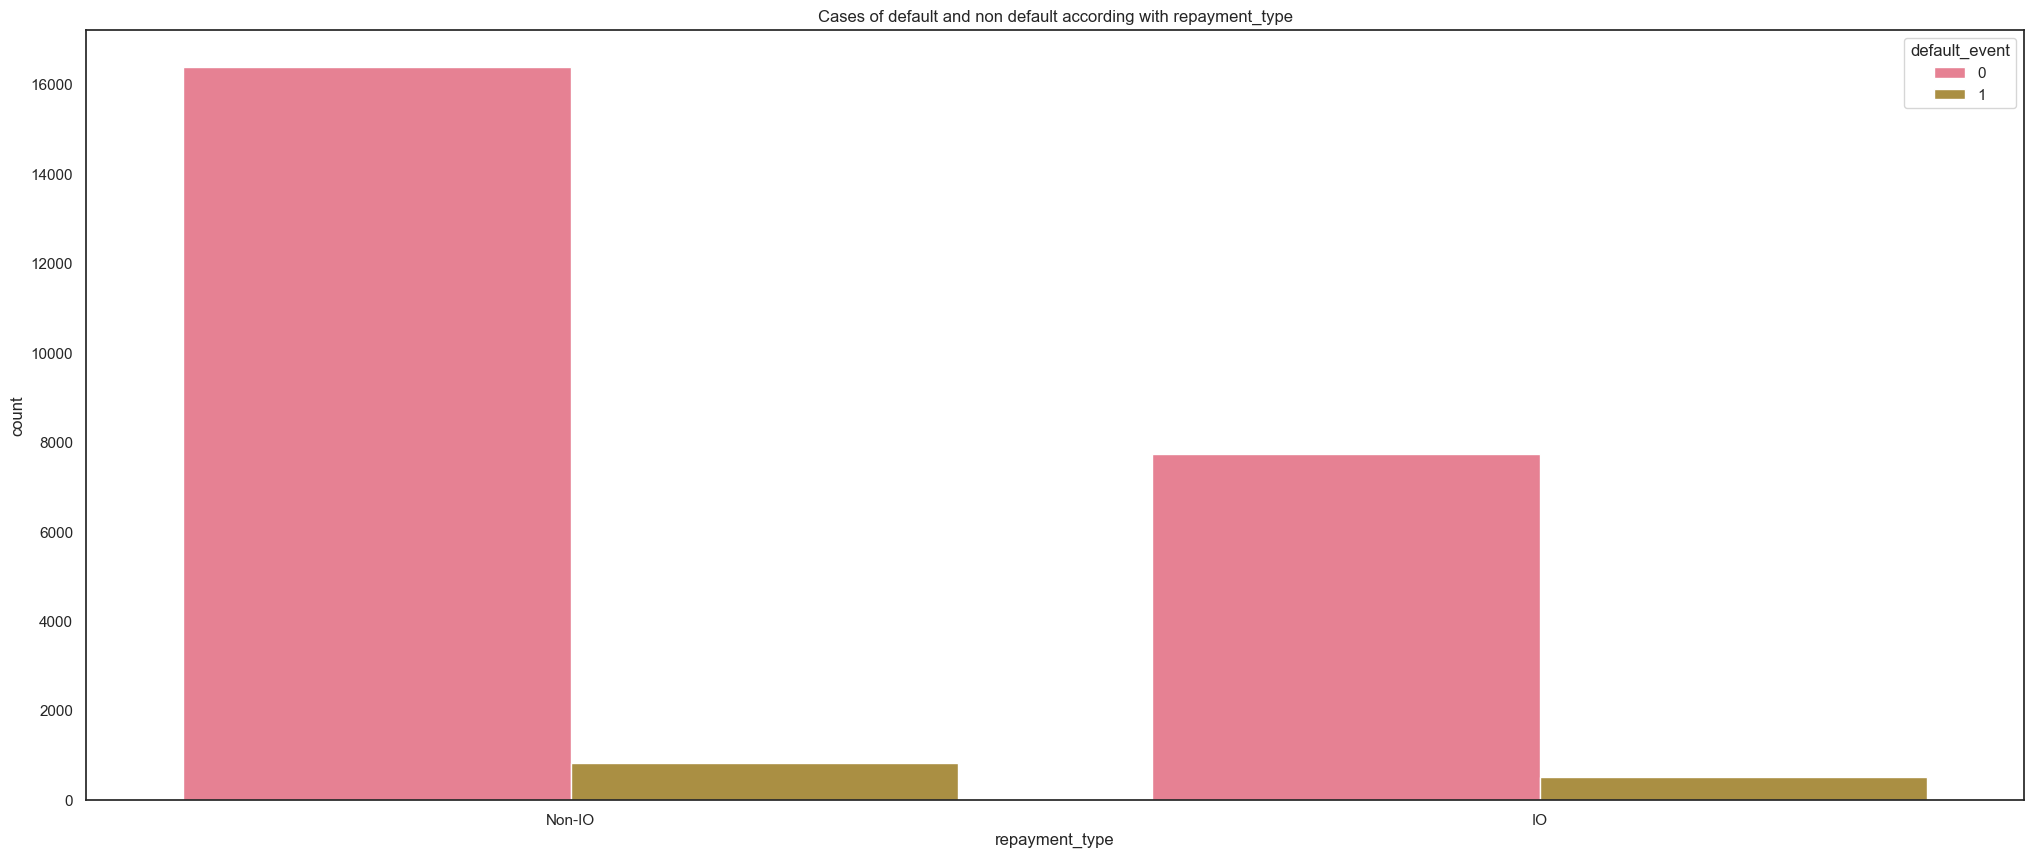

In [30]:
# Cases of default and non default , variable repayment_type
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.repayment_type)
plt.title('Cases of default and non default according with repayment_type')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_status')

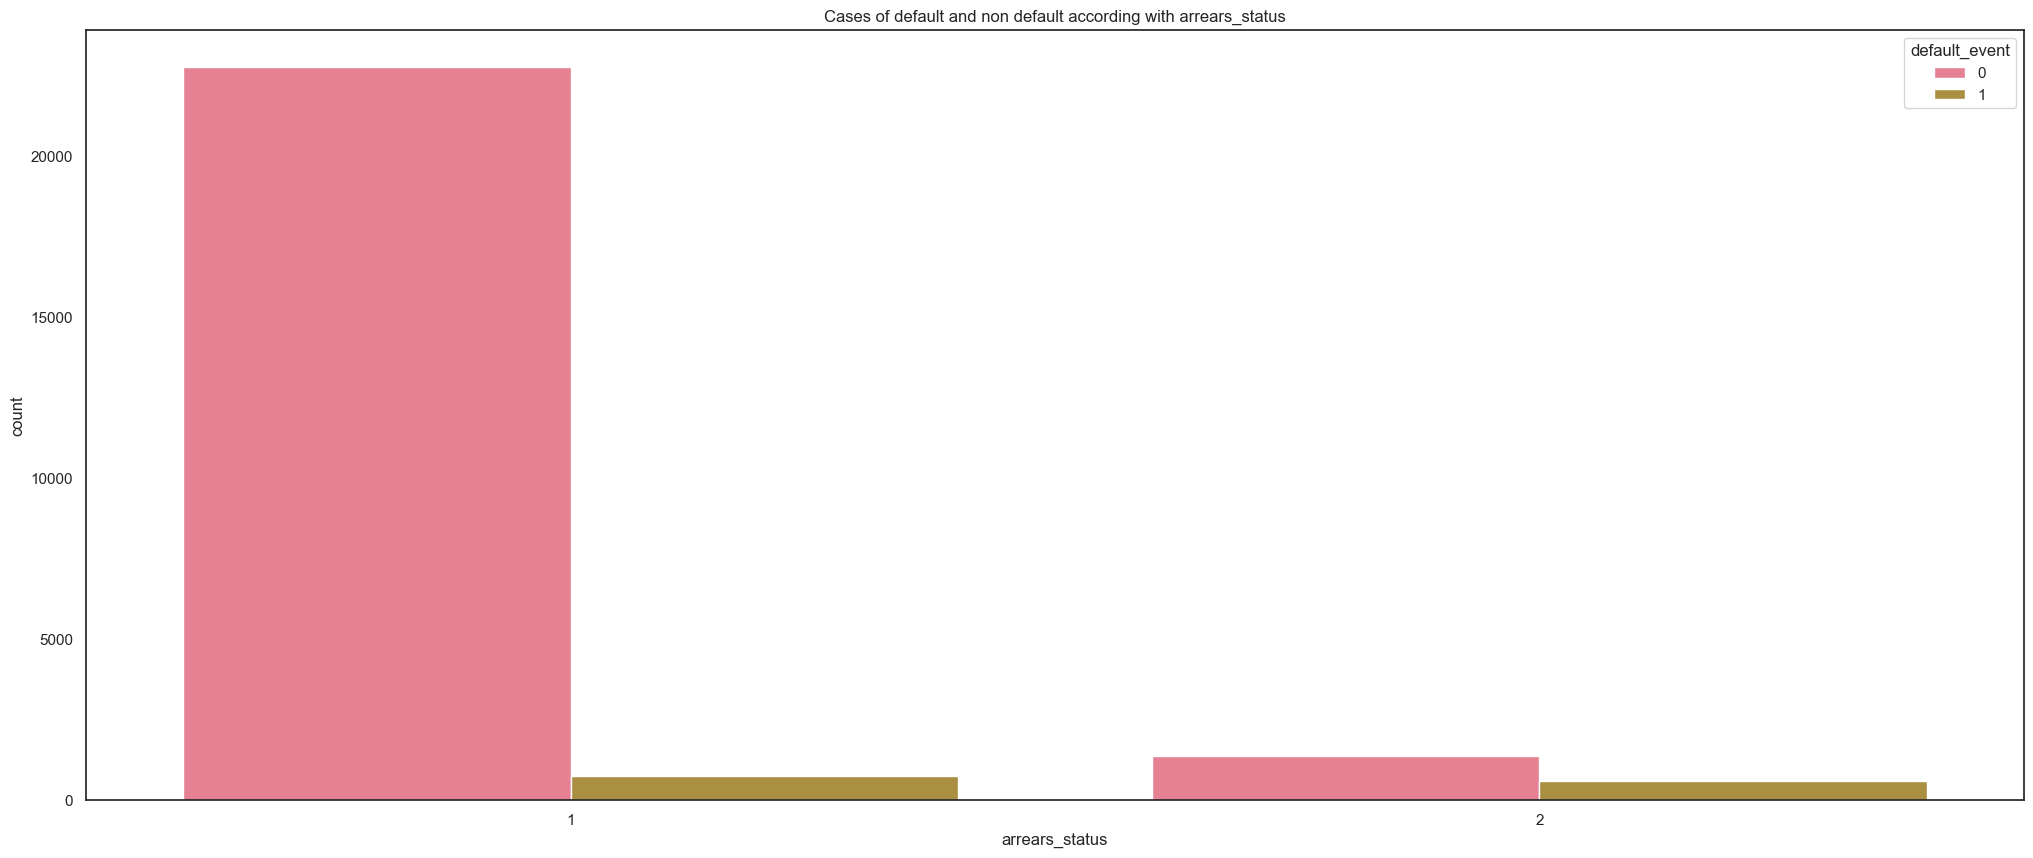

In [31]:
# Cases of default and non default , variable arrears_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_status)
plt.title('Cases of default and non default according with arrears_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_segment')

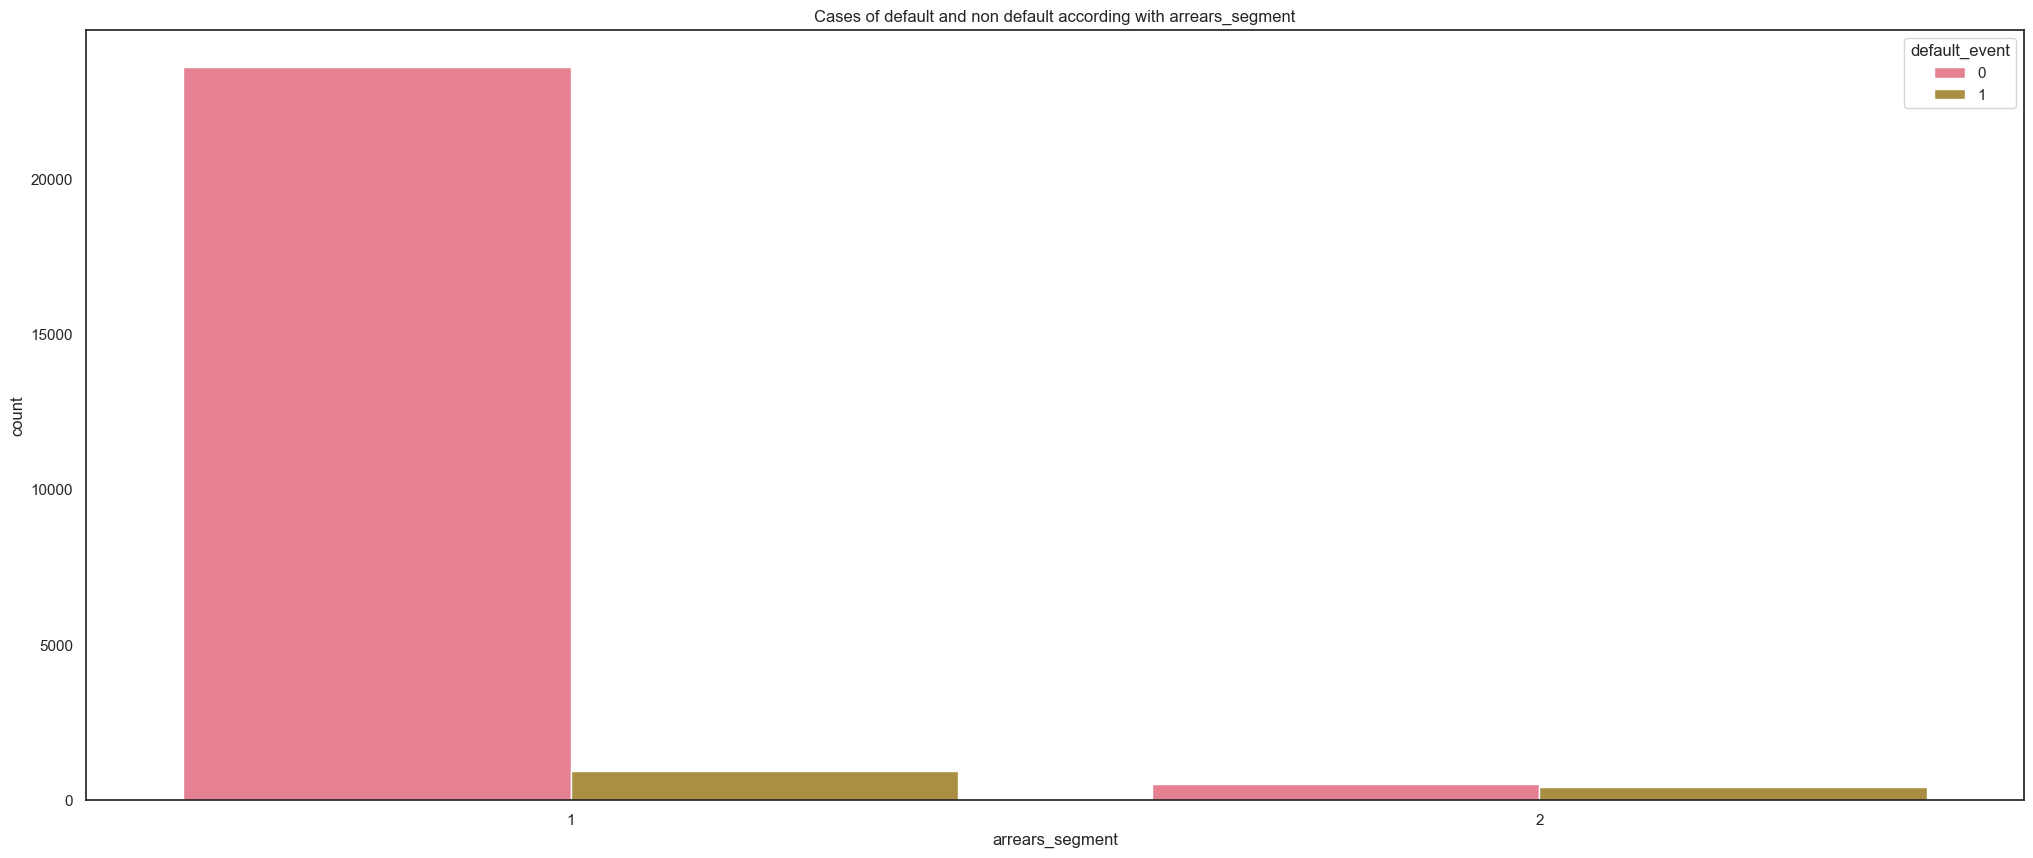

In [32]:
# Cases of default and non default , variable arrears_segment
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_segment)
plt.title('Cases of default and non default according with arrears_segment')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with live_status')

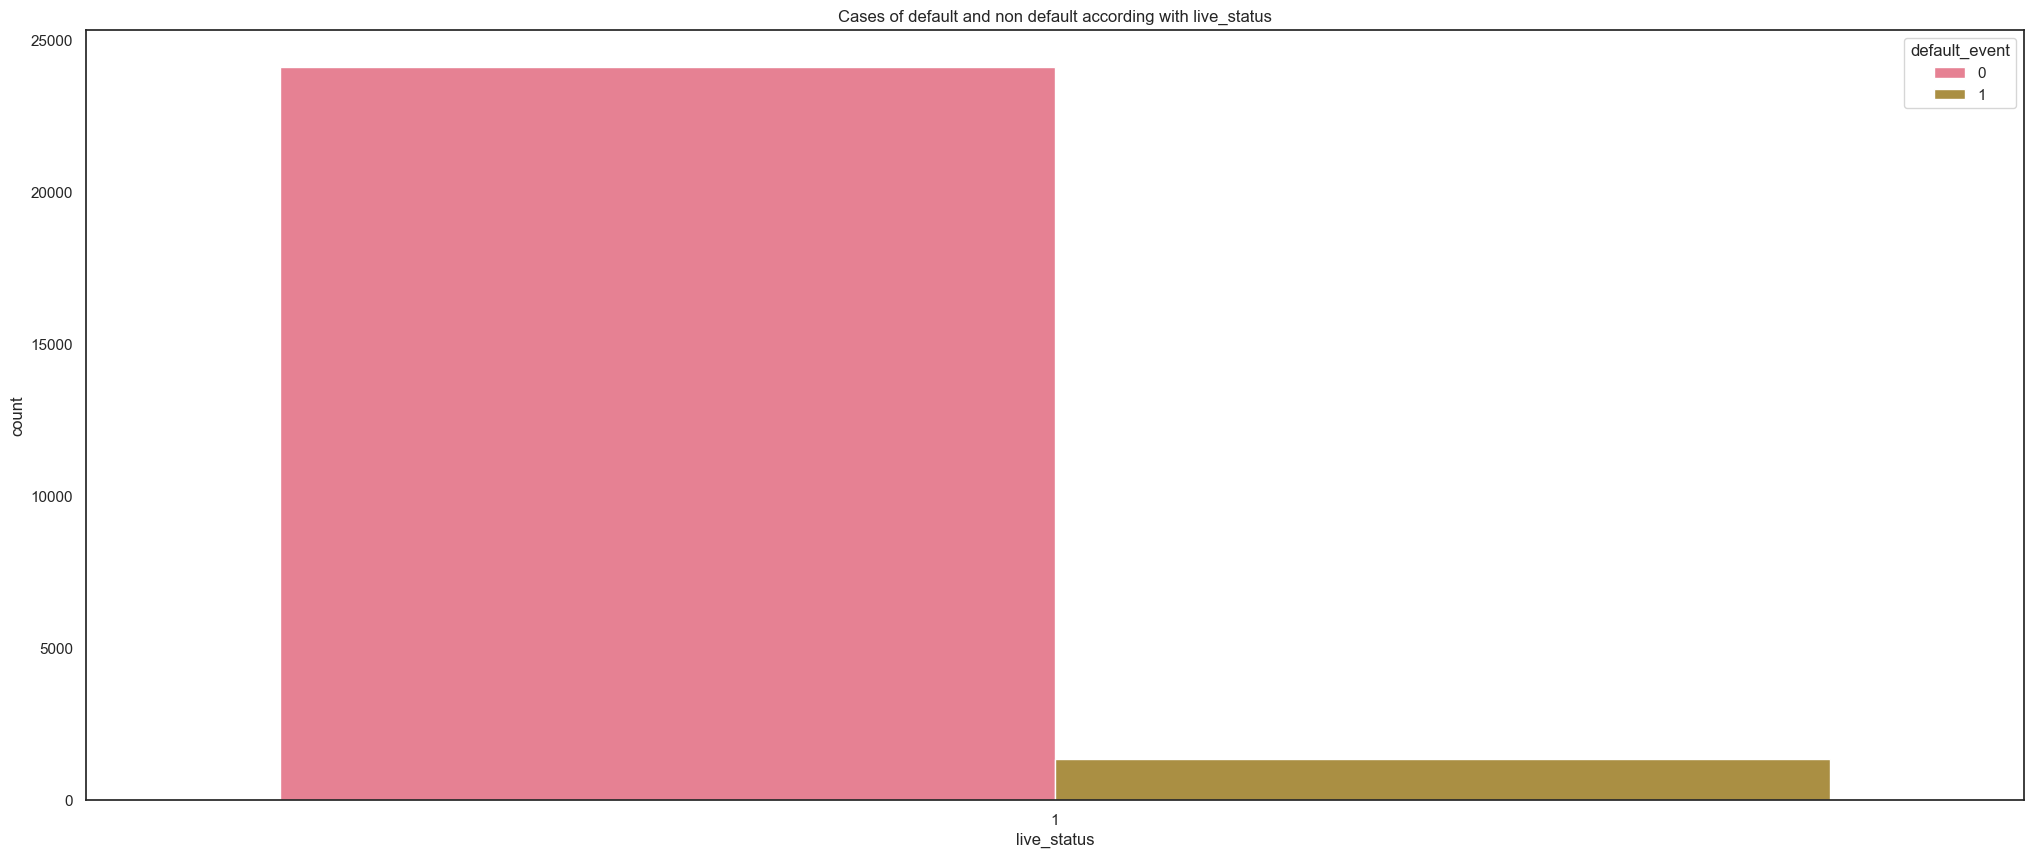

In [33]:
# Cases of default and non default , variable live_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.live_status)
plt.title('Cases of default and non default according with live_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with repaid_status')

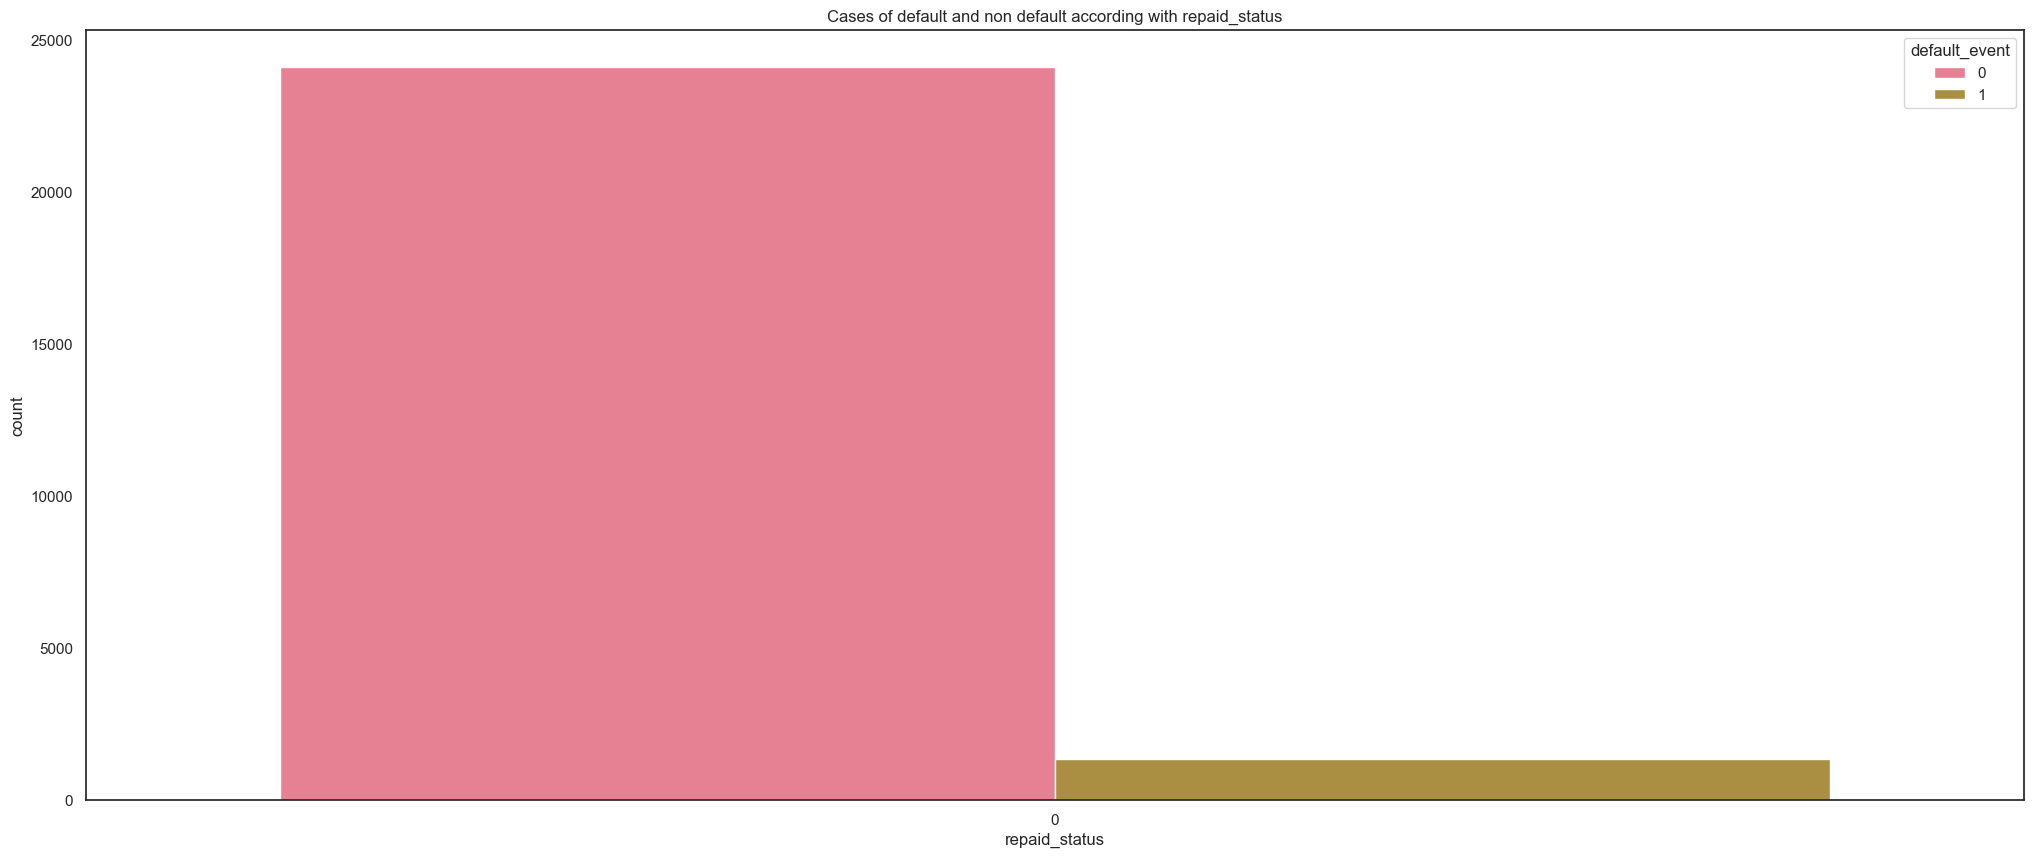

In [34]:
# Cases of default and non default , variable repaid_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.repaid_status)
plt.title('Cases of default and non default according with repaid_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with month')

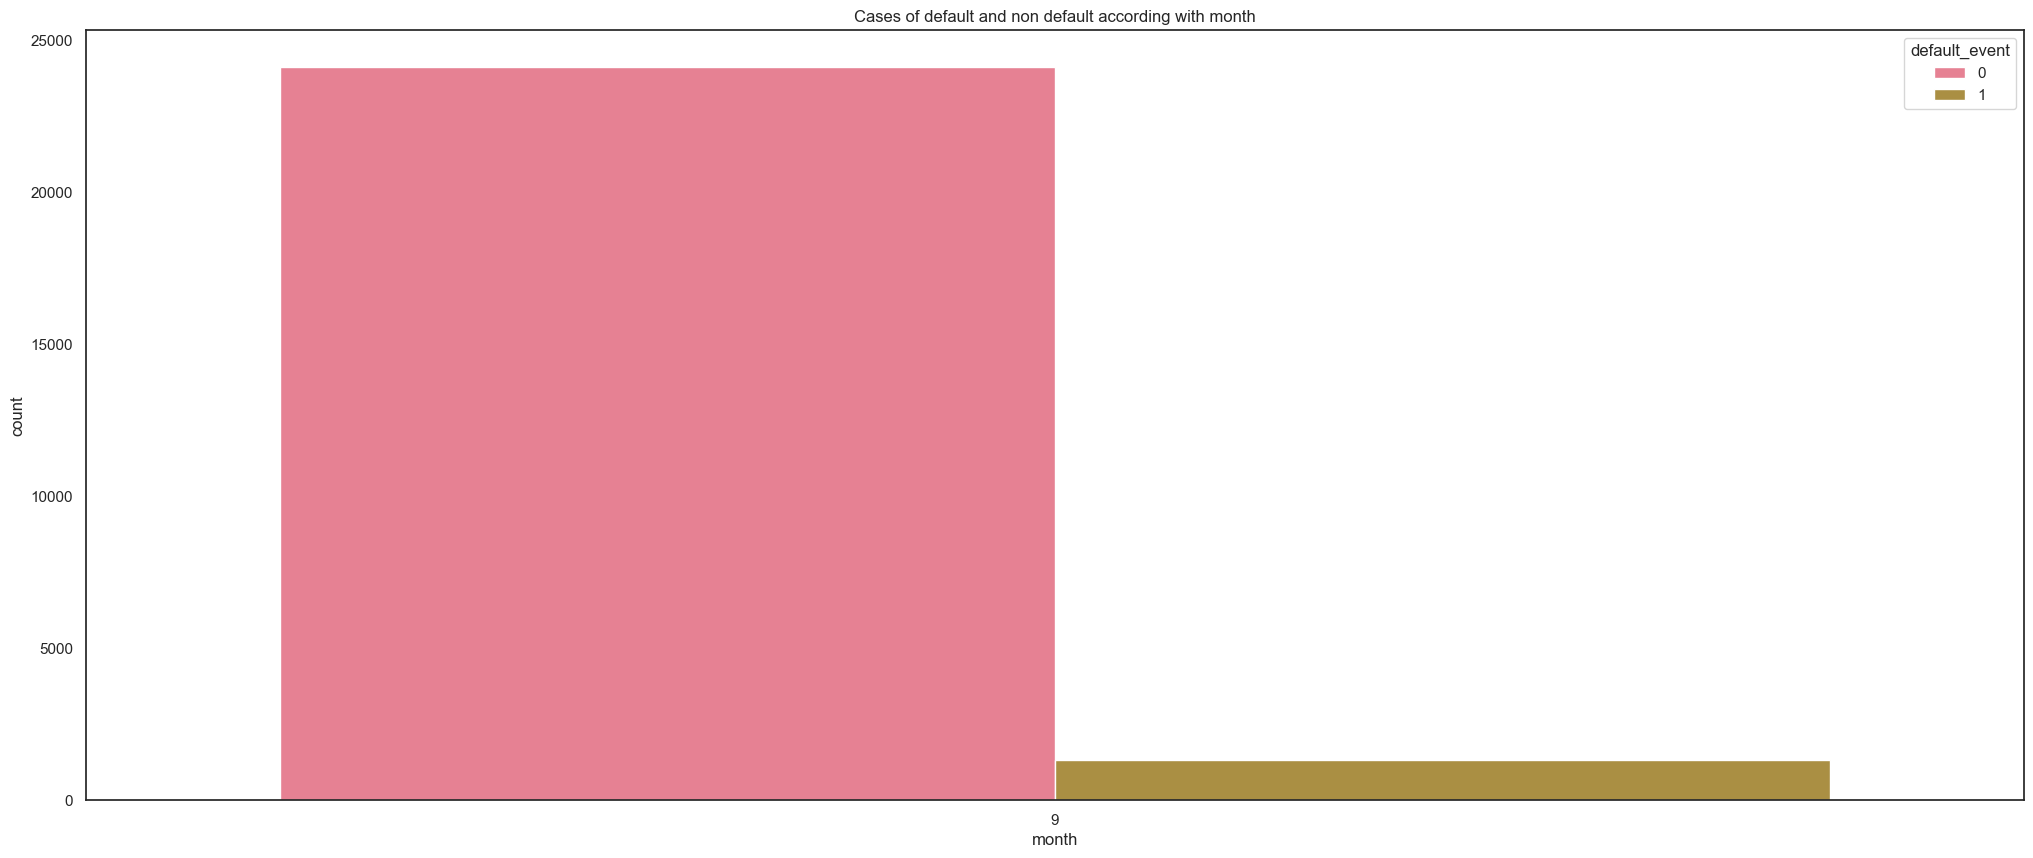

In [35]:
# Cases of default and non default , variable month
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.month)
plt.title('Cases of default and non default according with month')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with arrears_event')

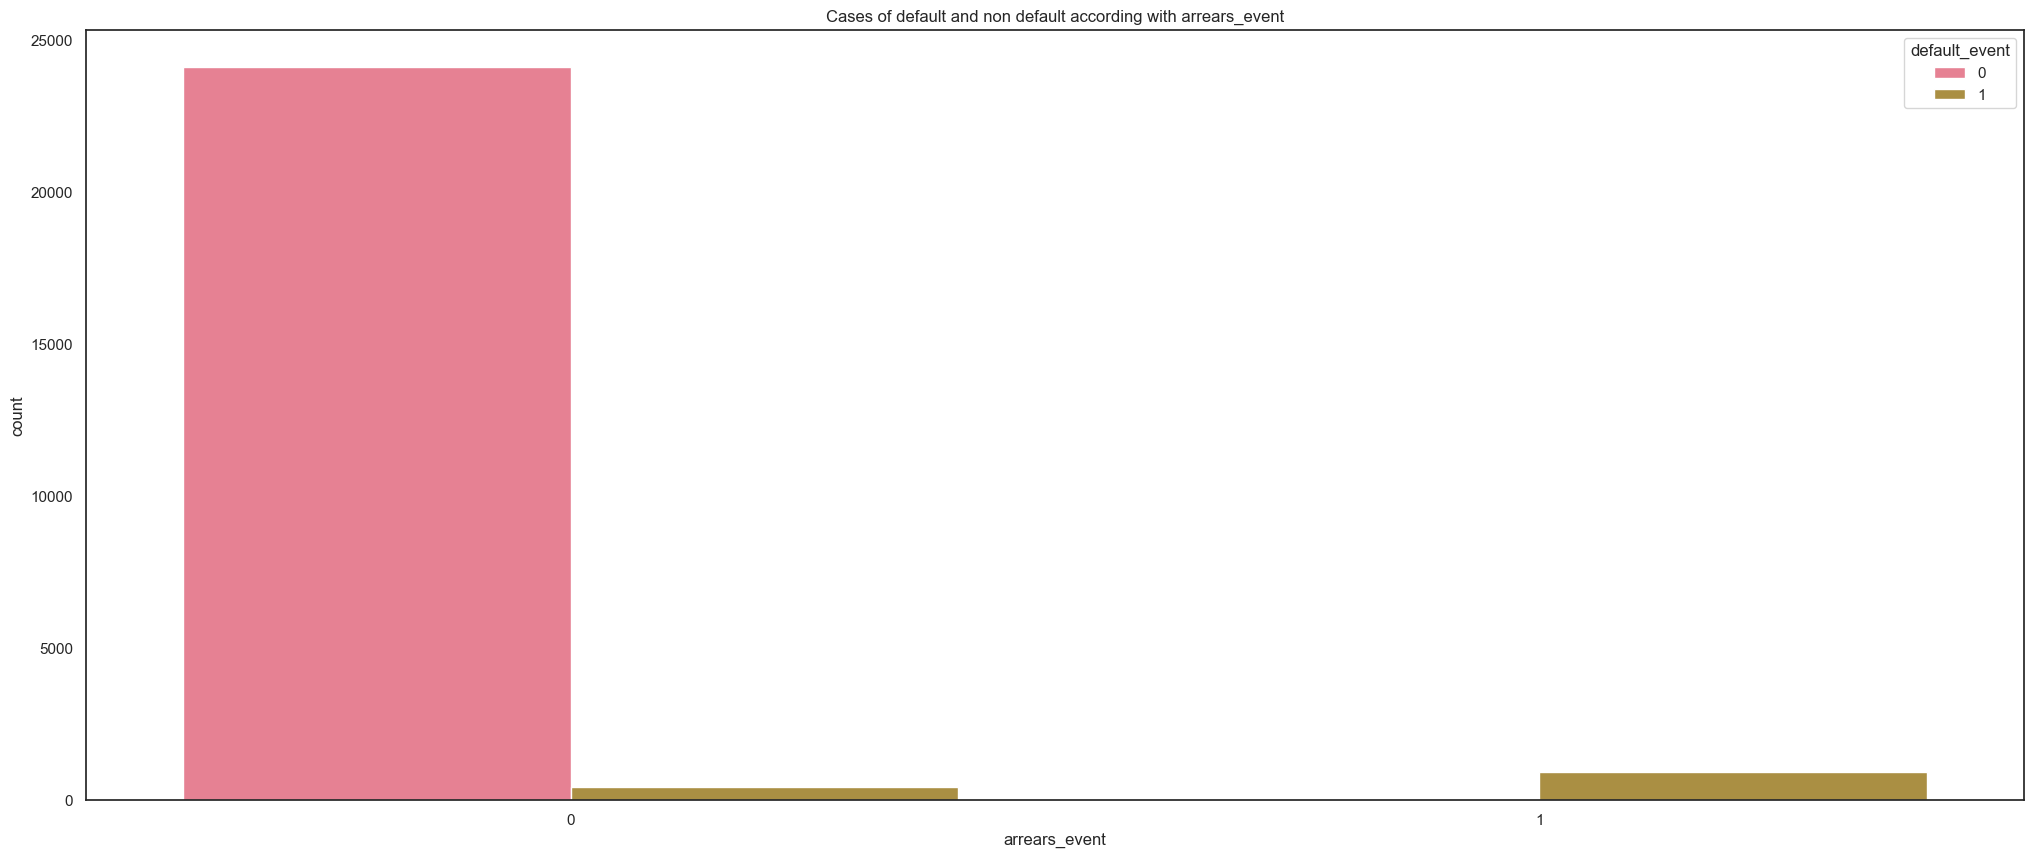

In [36]:
# Cases of default and non default , variable arrears_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.arrears_event)
plt.title('Cases of default and non default according with arrears_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with bankrupt_event')

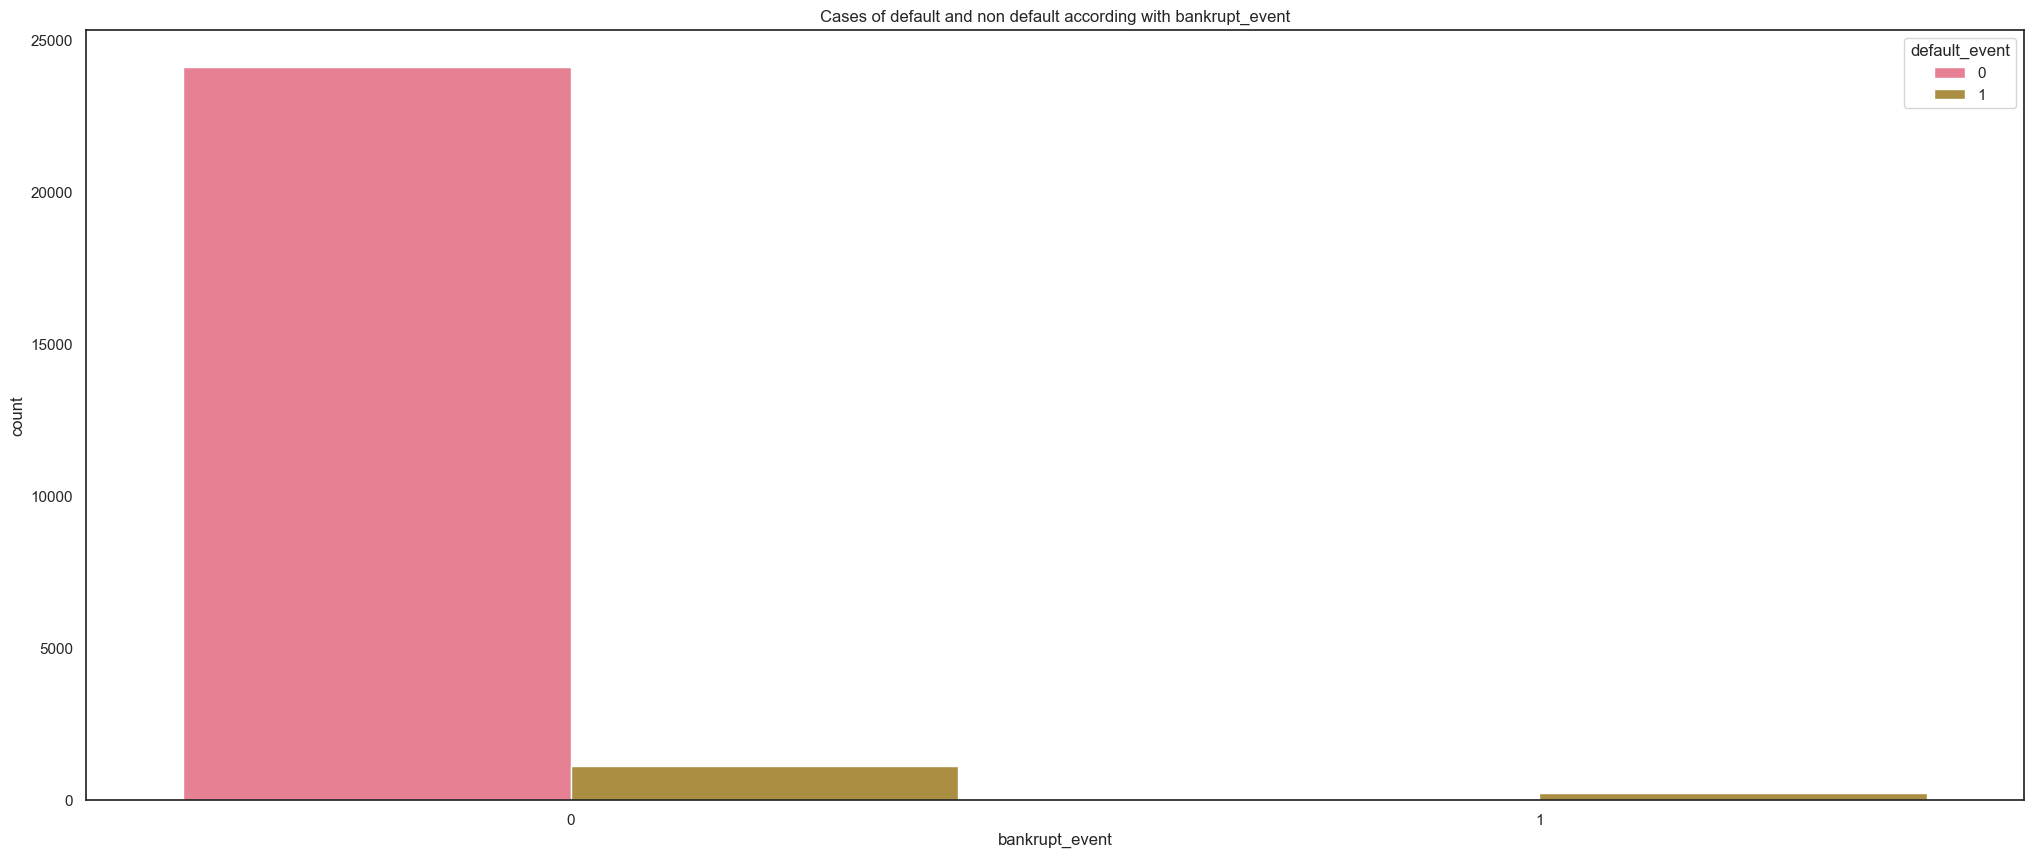

In [37]:
# Cases of default and non default , variable bankrupt_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.bankrupt_event)
plt.title('Cases of default and non default according with bankrupt_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with term_expiry_event')

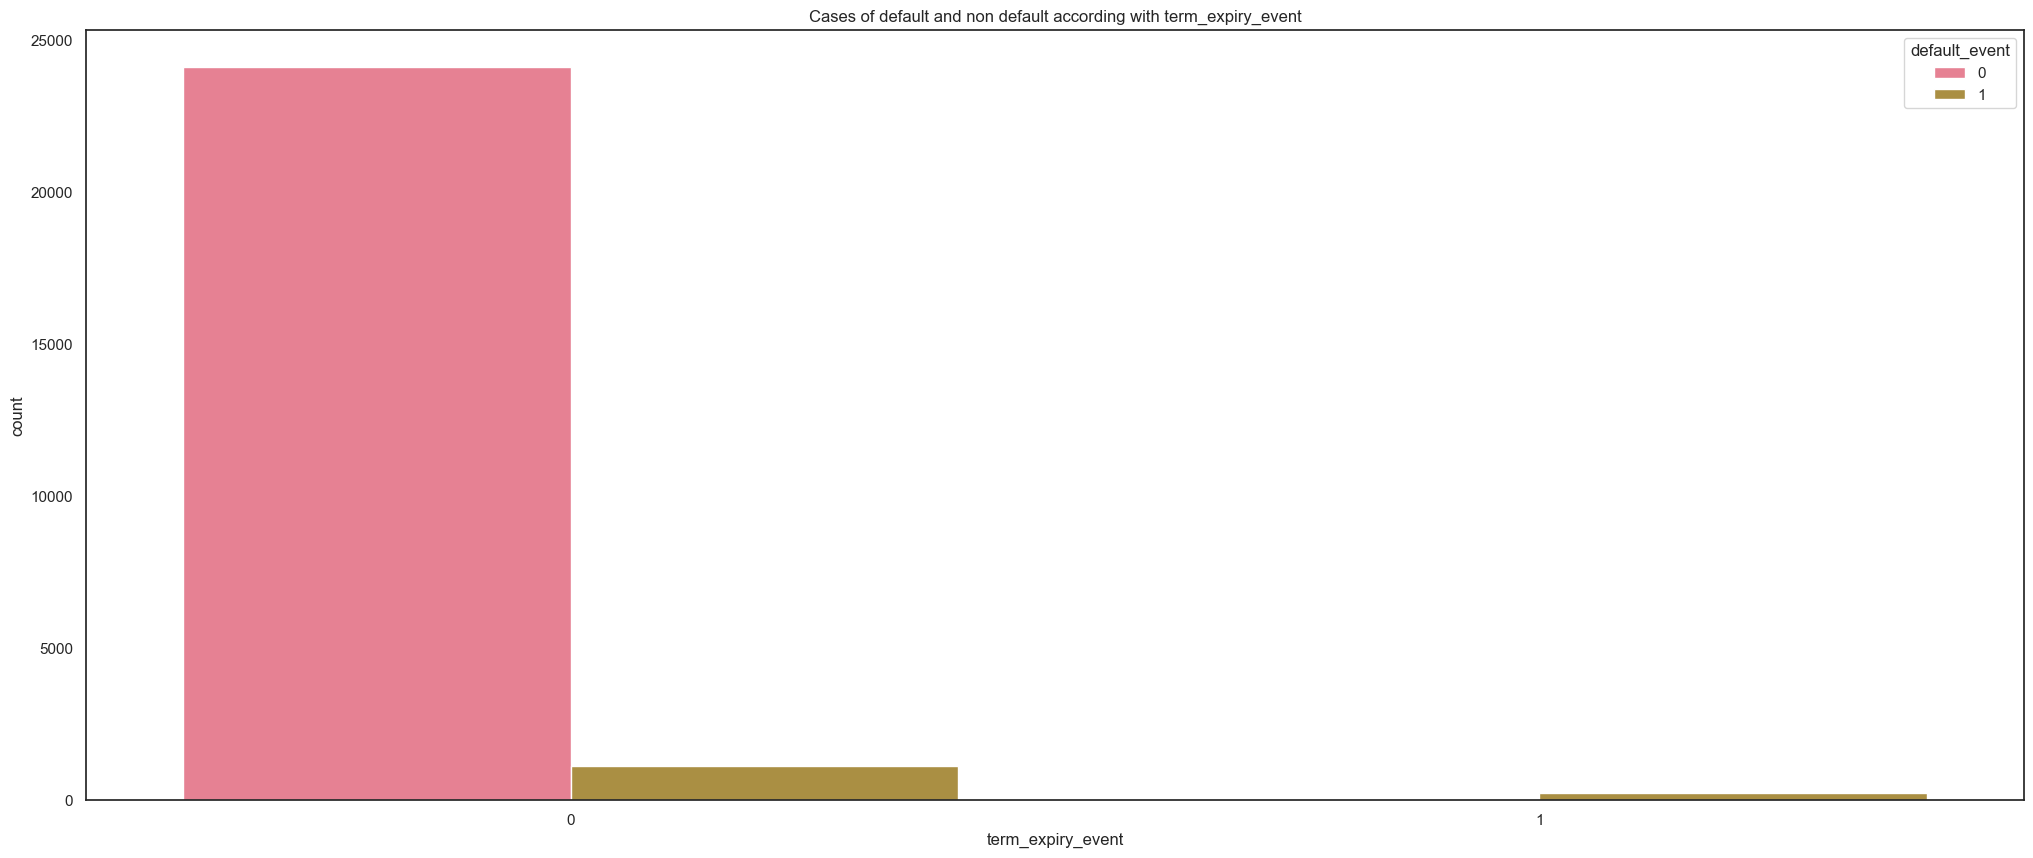

In [38]:
# Cases of default and non default , variable term_expiry_event
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.term_expiry_event)
plt.title('Cases of default and non default according with term_expiry_event')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with worst_arrears_status')

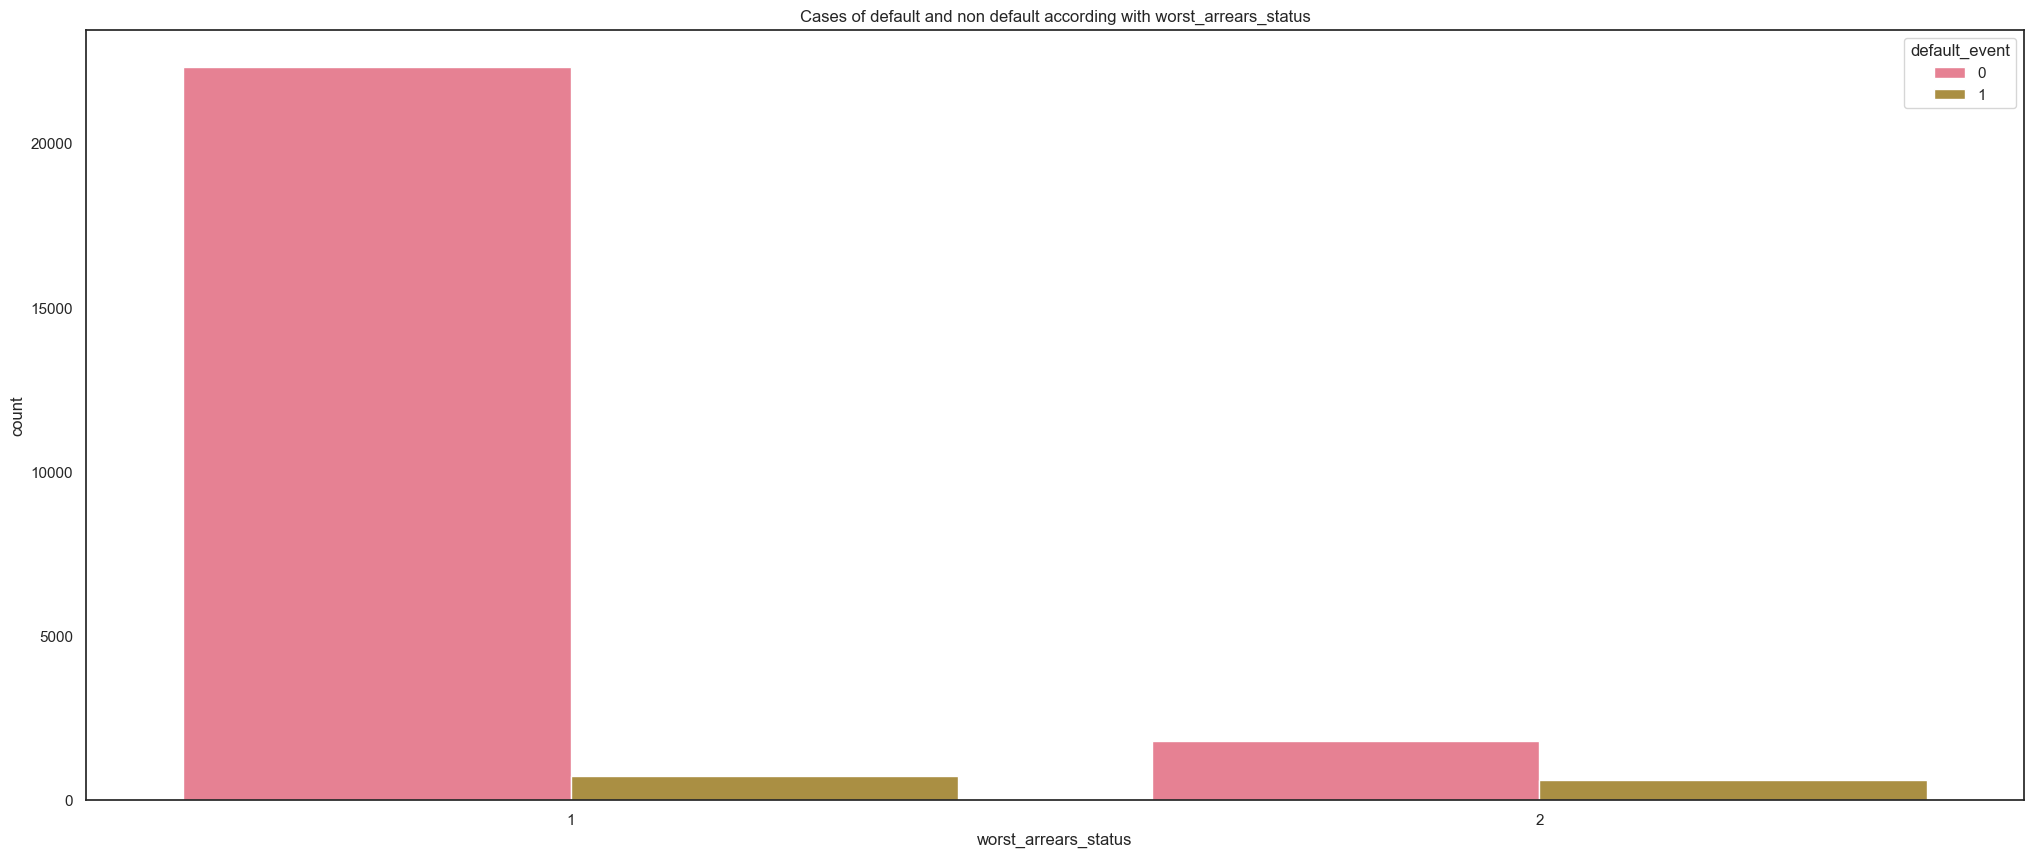

In [39]:
# Cases of default and non default , variable worst_arrears_status
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.worst_arrears_status)
plt.title('Cases of default and non default according with worst_arrears_status')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with avg_mia_6m')

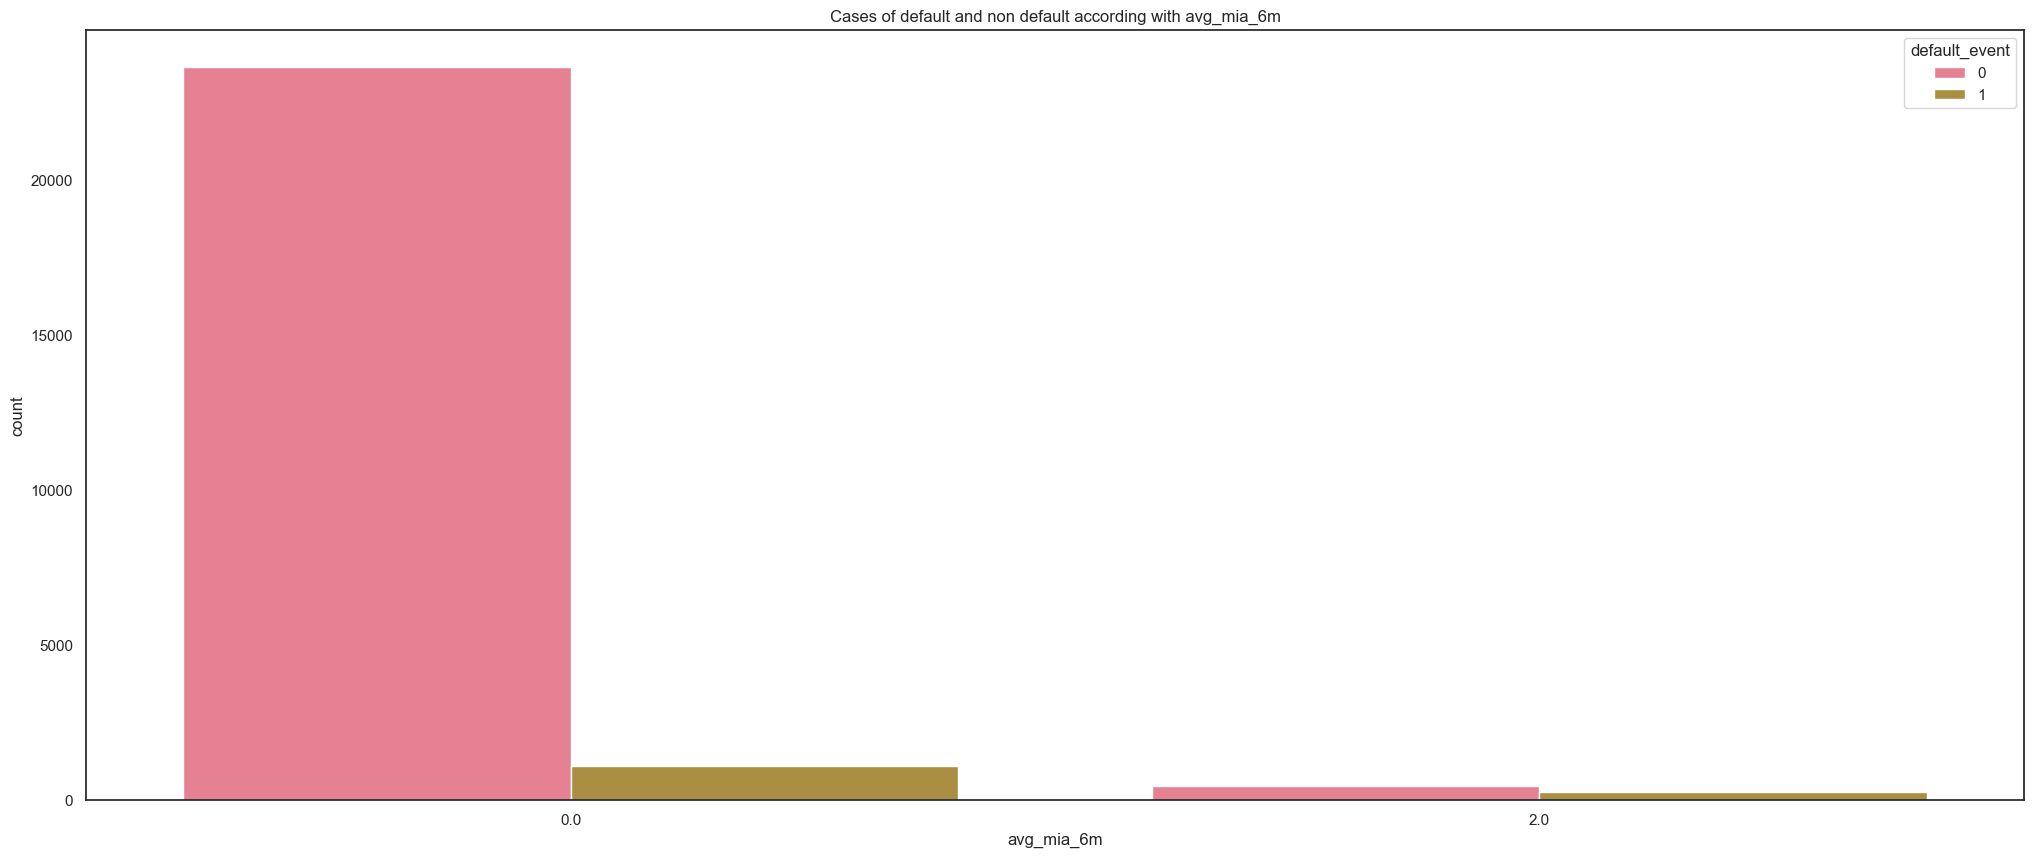

In [40]:
# Cases of default and non default , variable avg_mia_6m
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.avg_mia_6m)
plt.title('Cases of default and non default according with avg_mia_6m')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with max_mia_6m')

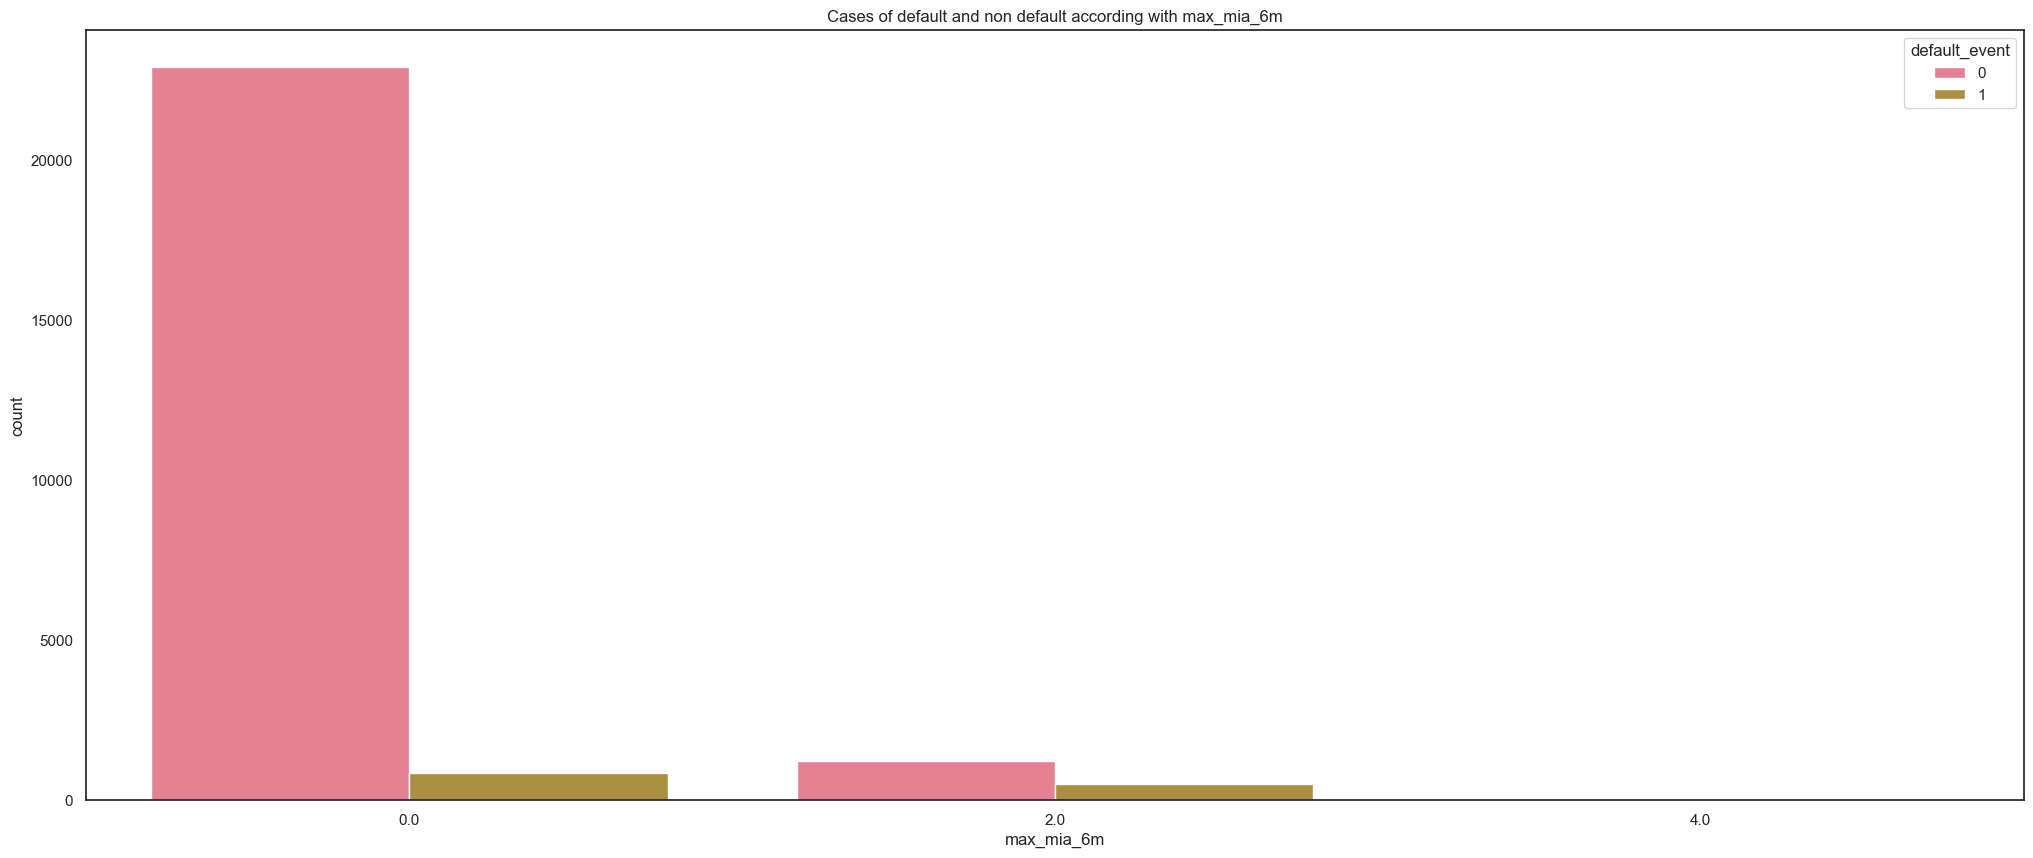

In [41]:
# Cases of default and non default , variable max_mia_6m
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.max_mia_6m)
plt.title('Cases of default and non default according with max_mia_6m')

## ok pl_flag, region, repayment_type

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

Text(0.5, 1.0, 'Cases of default and non default according with emp_length')

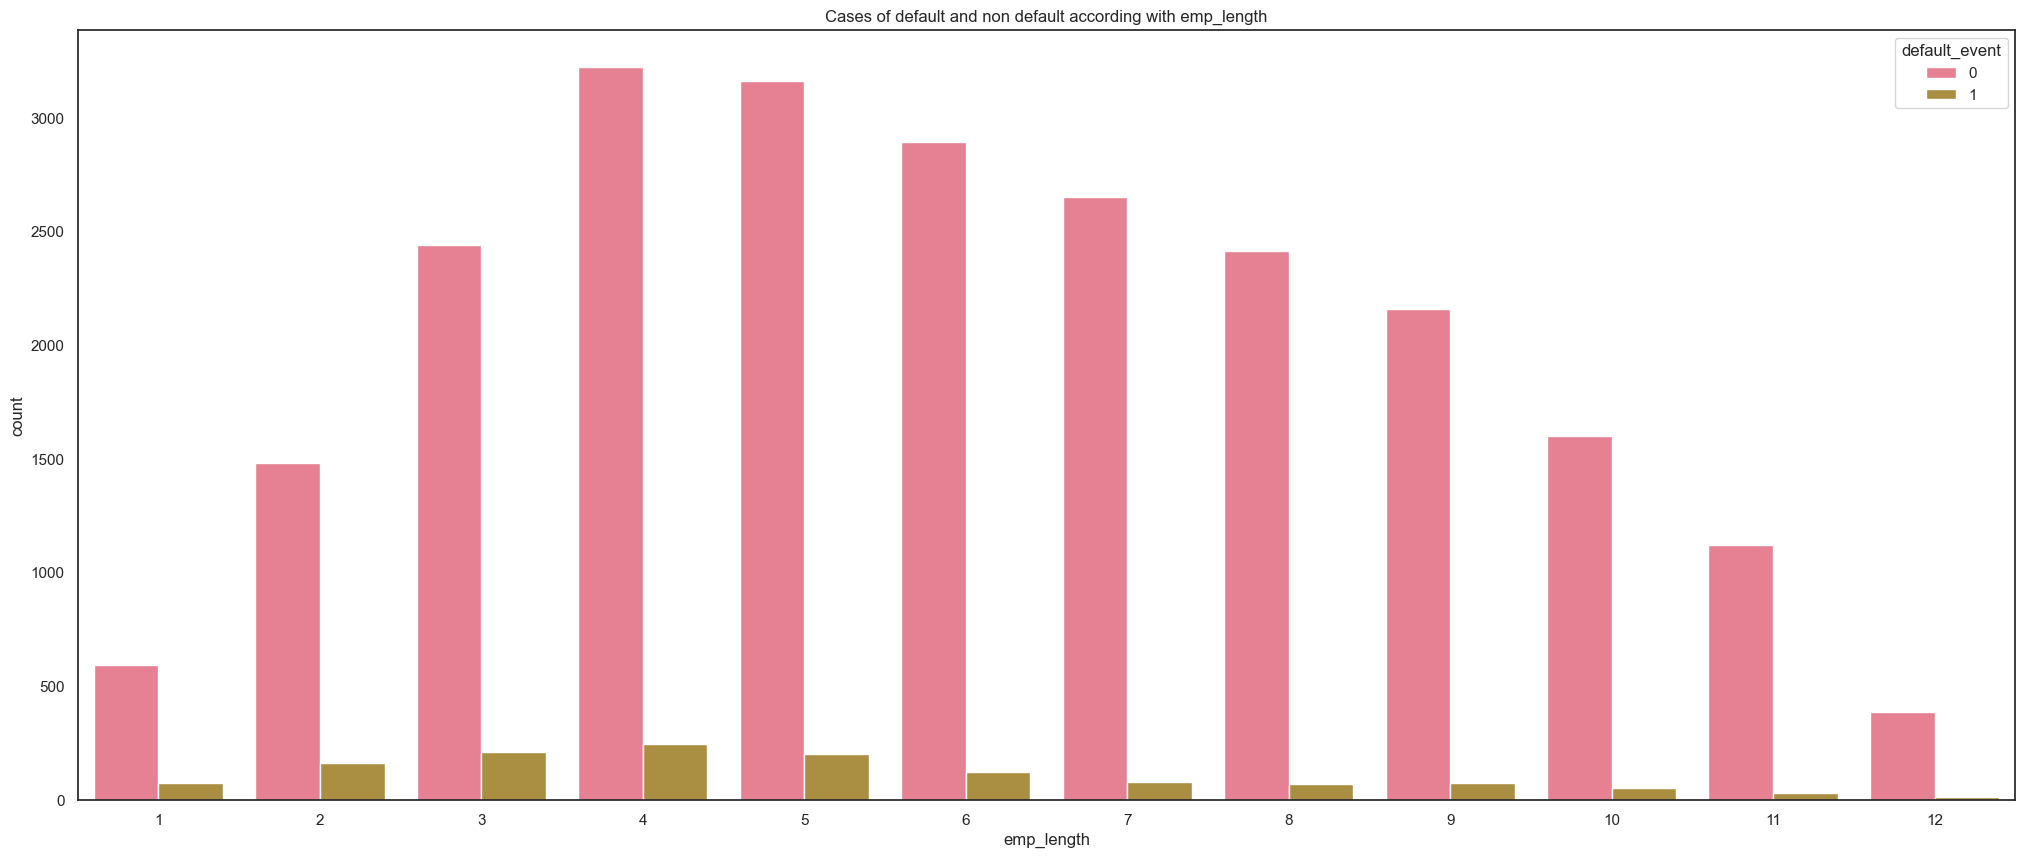

In [42]:
# Cases of default and non default , variable emp_length
plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.default_event, x = df2.emp_length)
plt.title('Cases of default and non default according with emp_length')

## ok pl_flag, region, repayment_type, emp_length

#'num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
#           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
#           'max_mia_6m','emp_length']

In [ ]:
# Visualmente podemos considerar pl_flag, region, repayment_type, emp_length como las variables categoricas
# para entrar dentro del análisis

array([[<Axes: title={'center': 'monthly_installment'}>,
        <Axes: title={'center': 'loan_balance'}>,
        <Axes: title={'center': 'bureau_score'}>,
        <Axes: title={'center': 'time_since_bankrupt'}>],
       [<Axes: title={'center': 'time_since_ccj'}>,
        <Axes: title={'center': 'ccj_amount'}>,
        <Axes: title={'center': 'min_months_since_bankrupt'}>,
        <Axes: title={'center': 'ltv'}>],
       [<Axes: title={'center': 'arrears_months'}>,
        <Axes: title={'center': 'mob'}>,
        <Axes: title={'center': 'remaining_mat'}>,
        <Axes: title={'center': 'loan_term'}>],
       [<Axes: title={'center': 'max_arrears_12m'}>,
        <Axes: title={'center': 'max_arrears_bal_6m'}>,
        <Axes: title={'center': 'avg_bal_6m'}>,
        <Axes: title={'center': 'avg_bureau_score_6m'}>],
       [<Axes: title={'center': 'cc_util'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'months_since_recent_cc_delinq'}>,
        <A

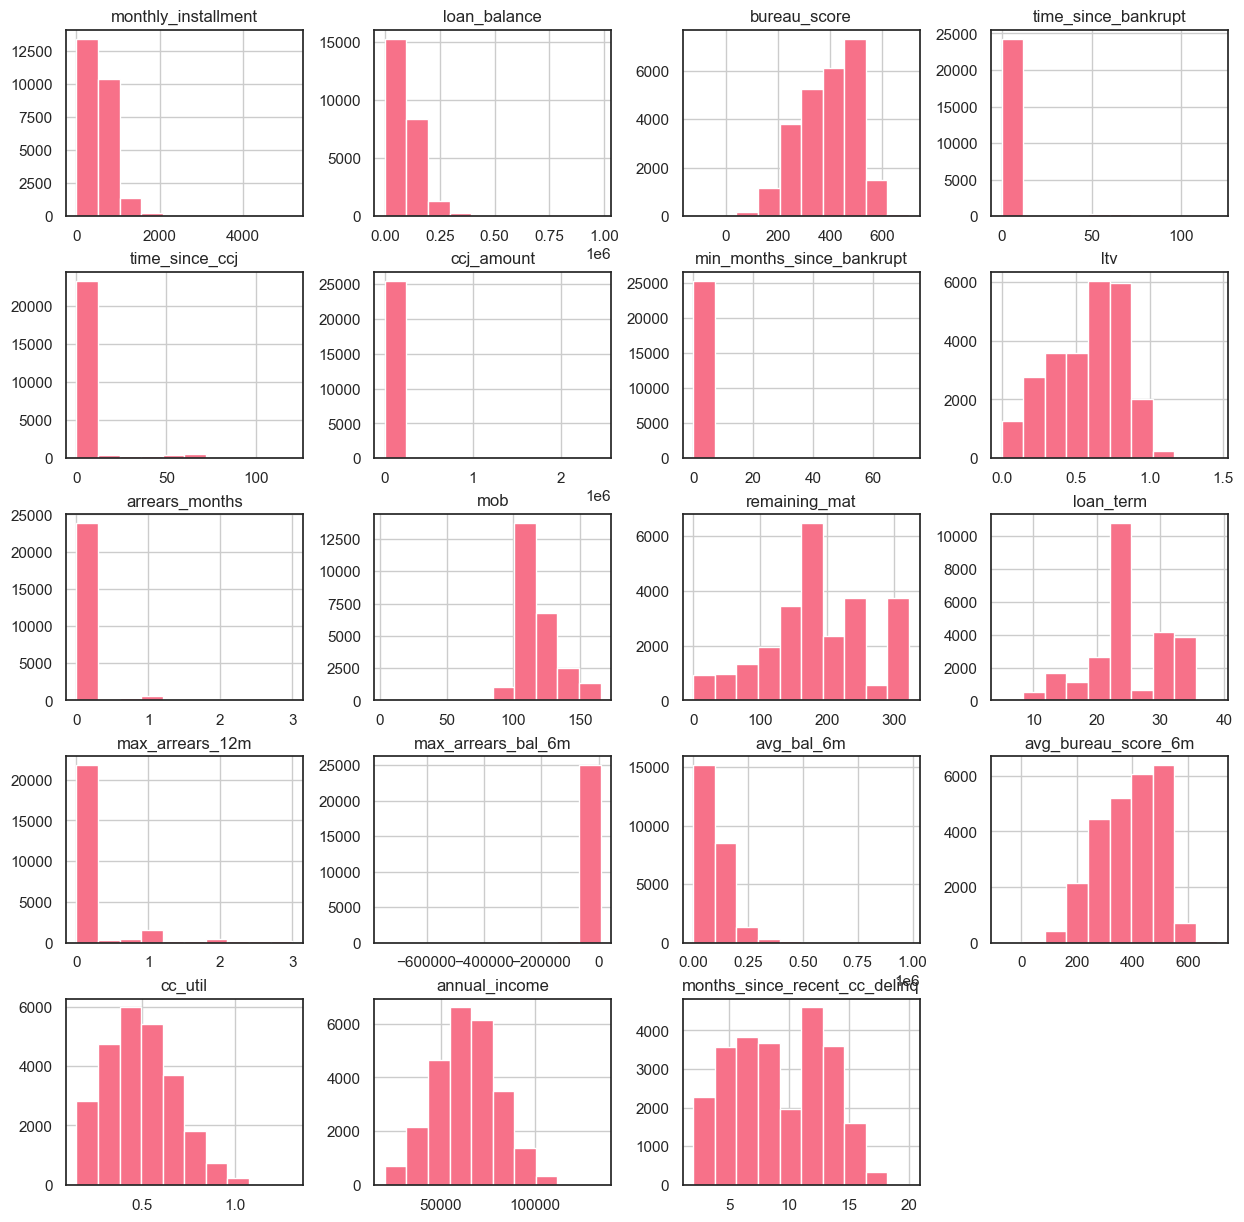

In [44]:
df2[var_con].hist(figsize = (15,15))

In [86]:
# df2['max_arrears_bal_6m'].hist(figsize = (15,15))

In [ ]:
# Visualmente podemos considerar 
# 'monthly_installment','loan_balance','bureau_score',
# 'ltv','mob','remaining_mat','loan_term','avg_bal_6m','avg_bureau_score_6m',
# 'cc_util','annual_income','months_since_recent_cc_delinq'
# para entrar dentro del análisis

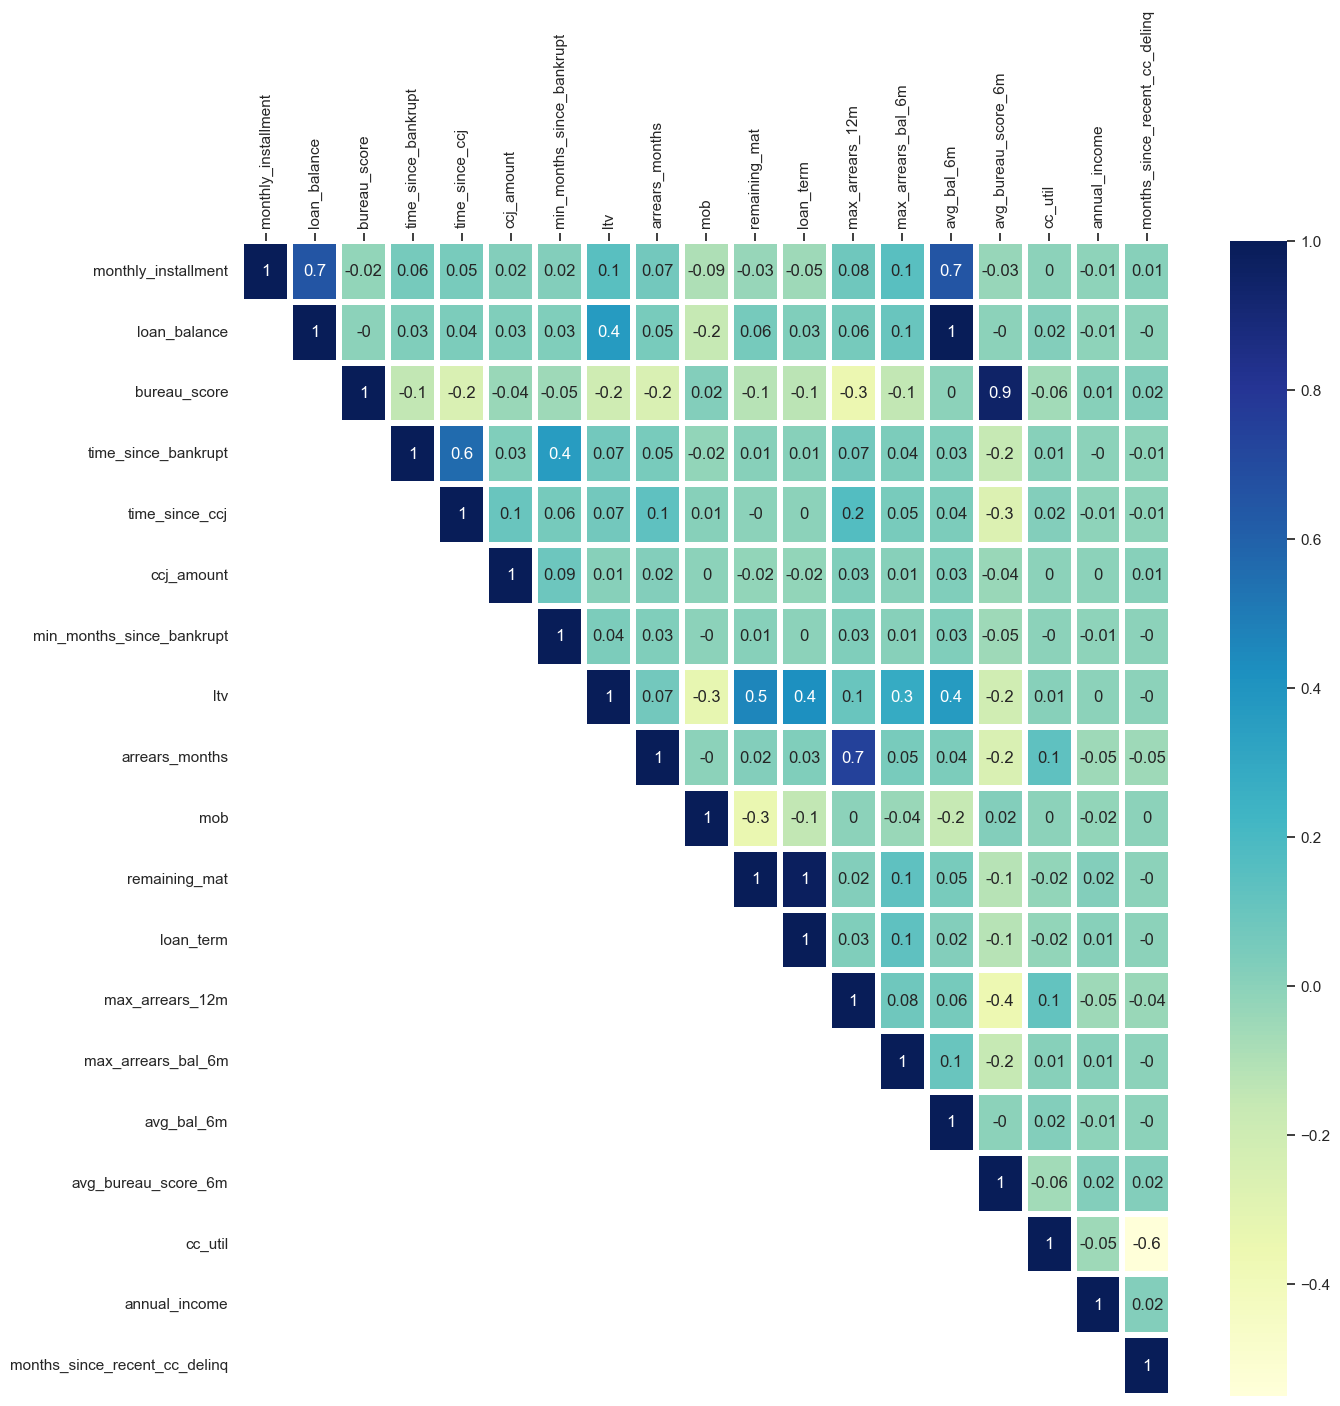

In [95]:
corr_df2_var_con = df2[var_con].corr()
mask = np.tri(corr_df2_var_con.shape[0],corr_df2_var_con.shape[1], k = -1)
plot_corr_up = plt.subplots(figsize = (15, 15))
plot_corr_up = sns.heatmap(round(corr_df2_var_con,2),mask = mask ,annot = True, cmap = 'YlGnBu', linewidths = 3, fmt = '.1g')
plot_corr_up.set(xlabel = "", ylabel = "")
plot_corr_up.xaxis.tick_top()
plot_corr_up.tick_params(axis = 'x', rotation = 90)

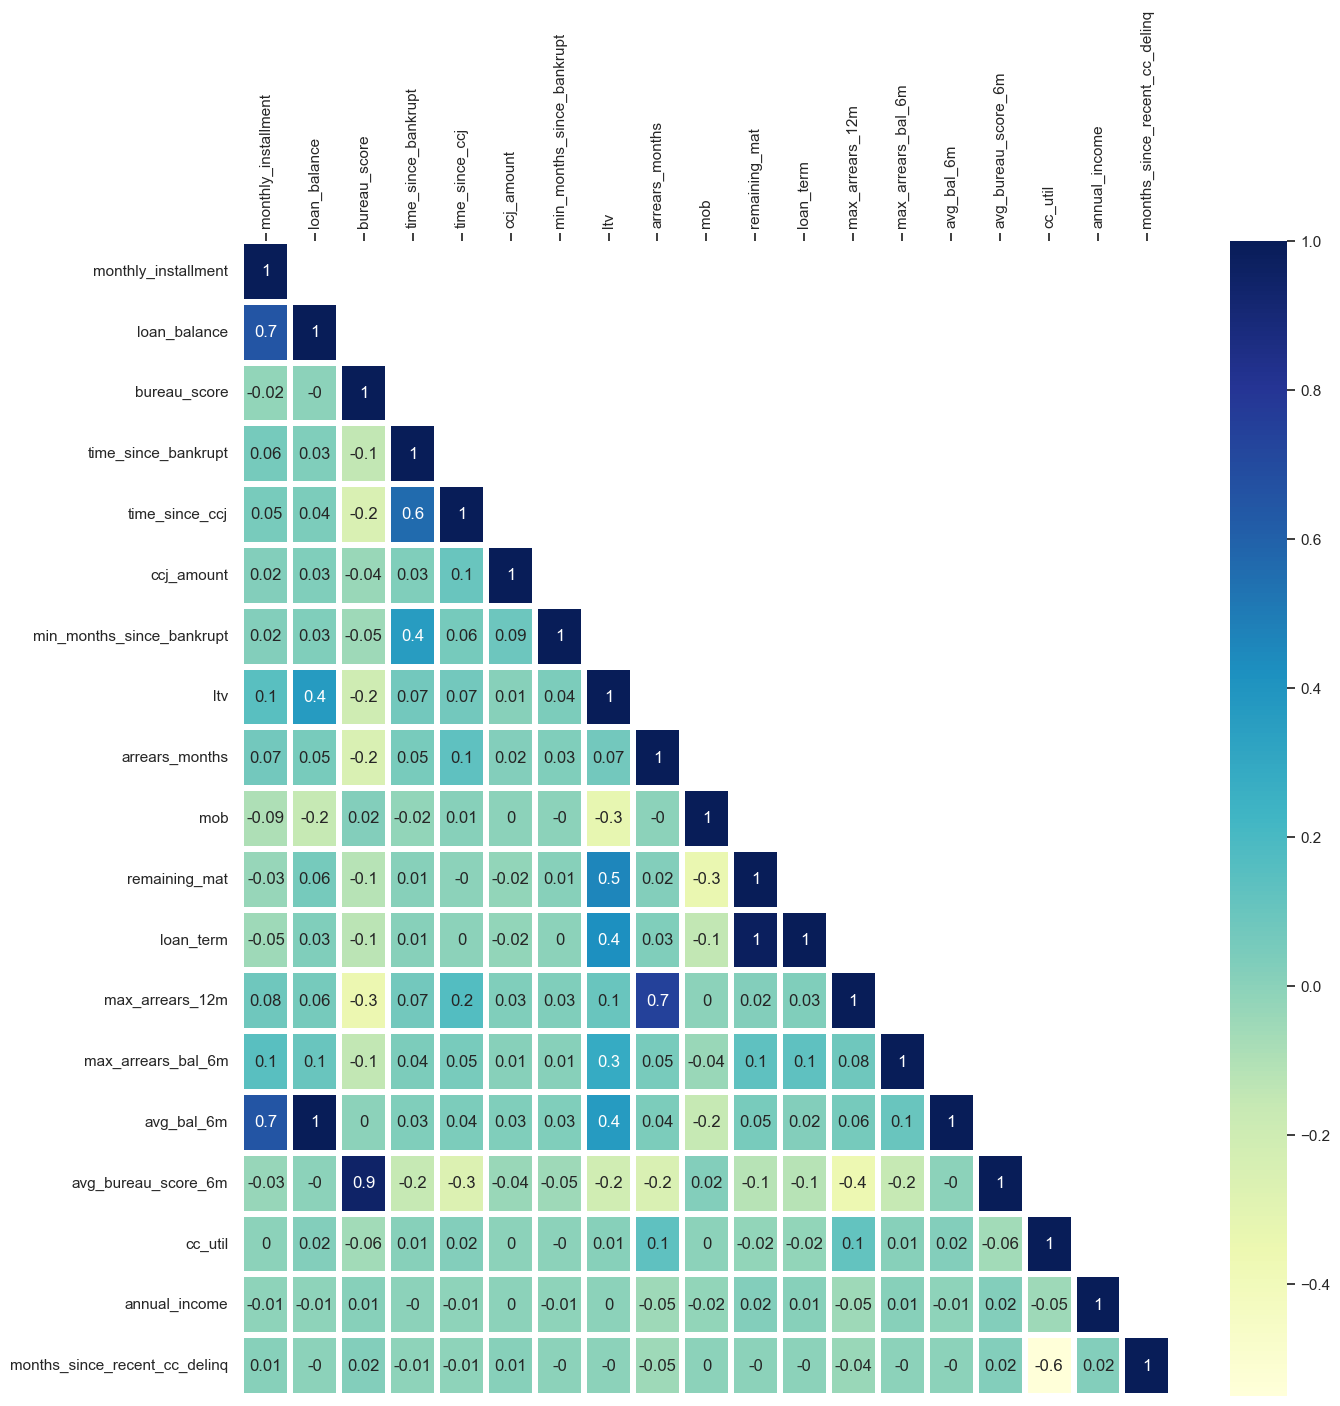

In [96]:
mask_lw = mask.T
plot_corr_lw = plt.subplots(figsize = (15, 15))
plot_corr_lw = sns.heatmap(round(corr_df2_var_con,2),mask = mask_lw ,annot = True, cmap = 'YlGnBu', linewidths = 3, fmt = '.1g')
plot_corr_lw.set(xlabel = "", ylabel = "")
plot_corr_lw.xaxis.tick_top()
plot_corr_lw.tick_params(axis = 'x', rotation = 90)

In [89]:
# Revisando la correlación, estás serían las posibles varieables a descartar
# annual income
# cc_util
# avg_bal_6m, está altamente correlacionada con monthly_atatement y loan _balance. Se elige loan_balance
# max_arrears_bal_6m
# loan_term
# remaining_mat
# min_months_since_bankrupt
# ccj_amount
# time_since_ccj

# En conclusion con la correlación y los histogramas podemos considerar 
# las siguientes variables para entrar dentro del análisis
# 'monthly_installment','loan_balance','bureau_score',
# 'ltv','mob','','','','avg_bureau_score_6m',
# '','annual_income','months_since_recent_cc_delinq'

var_con2 = ['monthly_installment','loan_balance','bureau_score','ltv','mob', 'avg_bureau_score_6m', 'annual_income', 'months_since_recent_cc_delinq' ]

#### 3.2 Identificación de variables unarias

In [87]:
# se sacan las variables : 
# var_cat no aplicables
# num_bankrupt
# num_bankrupt_iva
# num_iva
# arrears_status
# arrears_segment
# live_status
# repaid_status
# month
# arrears_event
# bannkrupt_event
# term_expiry_event
# avg_mia_6m
# max_mia_6m
# dentro de la lista de var_cat debido a que se consideran como variables unarias
# es decir; que la mayor parte de la información se concentra en 
# una categoría en particular

# las nuevas variables categoricas
var_cat = ['num_ccj','pl_flag','region','repayment_type','worst_arrears_status','emp_length']

##### Discretización de variables

In [102]:
from sklearn.preprocessing import KBinsDiscretizer

#### Función

In [107]:
def discretizar(df, v, k):

    kb = KBinsDiscretizer( n_bins = k , encode='ordinal', strategy = 'quantile')
    kb.fit(df[[v]])
    df[f'z_{v}_{k}'] = pd.cut( df[v] , bins = kb.bin_edges_[0] , include_lowest = True ).astype(str)

    return df

In [108]:
for v in var_con2:
    for k in range(2,6):
        df3 = discretizar( df2 , v , k )

In [109]:
df3.head()

,id,vintage_year,monthly_installment,loan_balance,bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,...,z_avg_bureau_score_6m_4,z_avg_bureau_score_6m_5,z_annual_income_2,z_annual_income_3,z_annual_income_4,z_annual_income_5,z_months_since_recent_cc_delinq_2,z_months_since_recent_cc_delinq_3,z_months_since_recent_cc_delinq_4,z_months_since_recent_cc_delinq_5
0,6670001,2005,746.70,131304.44,541.0,0.0,0.0,0.0,0.0,0.0,...,"(482.0, 706.0]","(496.0, 706.0]","(63738.0, 135140.0]","(71121.0, 135140.0]","(75159.0, 135140.0]","(68045.0, 77900.6]","(9.0, 20.0]","(7.0, 11.0]","(9.0, 12.0]","(10.0, 13.0]"
1,9131199,2006,887.40,115486.51,441.0,0.0,0.0,0.0,0.0,0.0,...,"(482.0, 706.0]","(434.0, 496.0]","(63738.0, 135140.0]","(71121.0, 135140.0]","(75159.0, 135140.0]","(77900.6, 135140.0]","(1.999, 9.0]","(1.999, 7.0]","(6.0, 9.0]","(5.0, 8.0]"
2,4963167,2004,1008.50,128381.73,282.0,0.0,0.0,1.0,36.0,459.0,...,"(-70.001, 306.0]","(286.0, 366.0]","(20052.999, 63738.0]","(20052.999, 56448.0]","(20052.999, 52213.0]","(20052.999, 49384.8]","(1.999, 9.0]","(1.999, 7.0]","(1.999, 6.0]","(5.0, 8.0]"
3,3918582,2005,458.23,35482.96,461.0,0.0,0.0,0.0,0.0,0.0,...,"(402.0, 482.0]","(434.0, 496.0]","(20052.999, 63738.0]","(56448.0, 71121.0]","(52213.0, 63738.0]","(49384.8, 59461.0]","(1.999, 9.0]","(1.999, 7.0]","(1.999, 6.0]","(5.0, 8.0]"
4,5949777,2006,431.20,77086.31,466.0,0.0,0.0,0.0,0.0,0.0,...,"(402.0, 482.0]","(434.0, 496.0]","(63738.0, 135140.0]","(71121.0, 135140.0]","(75159.0, 135140.0]","(68045.0, 77900.6]","(1.999, 9.0]","(1.999, 7.0]","(1.999, 6.0]","(1.999, 5.0]"


In [114]:
var = df3.filter(like='z_').columns.to_list()

In [115]:
var

['z_monthly_installment_2',
 'z_monthly_installment_3',
 'z_monthly_installment_4',
 'z_monthly_installment_5',
 'z_loan_balance_2',
 'z_loan_balance_3',
 'z_loan_balance_4',
 'z_loan_balance_5',
 'z_bureau_score_2',
 'z_bureau_score_3',
 'z_bureau_score_4',
 'z_bureau_score_5',
 'z_ltv_2',
 'z_ltv_3',
 'z_ltv_4',
 'z_ltv_5',
 'z_mob_2',
 'z_mob_3',
 'z_mob_4',
 'z_mob_5',
 'z_avg_bureau_score_6m_2',
 'z_avg_bureau_score_6m_3',
 'z_avg_bureau_score_6m_4',
 'z_avg_bureau_score_6m_5',
 'z_annual_income_2',
 'z_annual_income_3',
 'z_annual_income_4',
 'z_annual_income_5',
 'z_months_since_recent_cc_delinq_2',
 'z_months_since_recent_cc_delinq_3',
 'z_months_since_recent_cc_delinq_4',
 'z_months_since_recent_cc_delinq_5']

#### 5.0 Análisis Univariado

#### 5.1 Information Value

#### Función

In [117]:
def calculo_iv( df, v, tgt ):
    aux = df.pivot_table( index = v, 
                         columns = tgt, 
                         values = um[0], 
                         aggfunc = 'count', 
                         fill_value = 0 )

    aux[list( range(2) ) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1]) * aux['w']
    return v, aux['iv'].sum()

In [130]:
# iv de discretizadas -> vari
iv = pd.DataFrame( map( lambda v: calculo_iv( df3, v, tgt  ) , var ) , 
                  columns=['variable','IV'] )

In [131]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join(x.split('_')[1:2] ) )
iv = iv.sort_values(by = ['raiz','IV'],ascending=[1,0]).reset_index(drop=True)

# Eliminación de ivs infs
iv = iv.loc[iv['IV'] != np.inf].reset_index(drop=True)
iv['id'] = iv.groupby('raiz').cumcount() + 1
iv = iv.loc[iv.id == 1]

iv.drop(columns=['raiz','id'],inplace = True)

In [132]:
iv

,variable,IV
0,z_annual_income_5,0.409042
4,z_avg_bureau_score_6m_5,0.531387
8,z_bureau_score_5,0.532512
12,z_loan_balance_4,0.011856
16,z_ltv_4,0.022971
20,z_mob_3,0.014578
24,z_monthly_installment_5,0.012998
28,z_months_since_recent_cc_delinq_4,0.504738


In [133]:
var_best = iv['variable'].tolist()
len(var_best) , var_best

(8,
 ['z_annual_income_5',
  'z_avg_bureau_score_6m_5',
  'z_bureau_score_5',
  'z_loan_balance_4',
  'z_ltv_4',
  'z_mob_3',
  'z_monthly_installment_5',
  'z_months_since_recent_cc_delinq_4'])

In [134]:
iv['rankeo'] = iv.apply(lambda x: 0 if x['IV'] == 0 or x['IV'] == -1
                                else 1 if x['IV'] > 0 and x['IV'] <= 0.02  # 1st condition
                                else  2 if x['IV'] > 0.02 and x['IV'] <= 0.1 # 2nd condition
                                else 3 if x['IV'] > 0.1 and x['IV'] <= 0.3 # 3rd condition
                                else 4 if x['IV'] > 0.3 and x['IV'] <= 0.5 # 4rd condition
                                else 5 if x['IV'] > 0.5 # 5rd condition 
                                else np.nan,axis = 1)

In [ ]:
#pip install optbinning

In [135]:
iv

,variable,IV,rankeo
0,z_annual_income_5,0.409042,4
4,z_avg_bureau_score_6m_5,0.531387,5
8,z_bureau_score_5,0.532512,5
12,z_loan_balance_4,0.011856,1
16,z_ltv_4,0.022971,2
20,z_mob_3,0.014578,1
24,z_monthly_installment_5,0.012998,1
28,z_months_since_recent_cc_delinq_4,0.504738,5


In [138]:
from optbinning import BinningProcess, OptimalBinning

(CVXPY) Jan 07 12:07:52 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 07 12:07:52 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
# Getting IV value for numerical variables 
iv_list_con = []

for val in var_best:

    x = df3[val].values
    y = df2['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'numerical', solver = 'cp')
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_list_con.append(binning_table.build().loc['Totals', 'IV'])

ValueError: could not convert string to float: '(68045.0, 77900.6]'

#### Partición de los datos

In [161]:
# creación del split
from sklearn.model_selection import train_test_split

X = df3[var_best + um ].copy()
#Y = df2[tgt + ['id']].copy()
Y = df3[um + tgt].copy()

Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=.3)

In [162]:
Xt.shape, Xv.shape, Yt.shape[0], Yv.shape[0]

((17825, 9), (7640, 9), 17825, 7640)

#### Transformación WoE

#### Codificación WoE

In [150]:
def codificacion_woe(df, v, tgt):
    aux = df.pivot_table( index = v,
                          columns = tgt,
                          values = um[0],
                          aggfunc = 'count',
                          fill_value = 0)

    aux[list( range(2) )] = aux / aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2) , axis=1 , inplace=True )

    aux = aux.to_dict()['w']
    
    return v, aux

In [163]:
mapa_woe = list( map(  lambda v: codificacion_woe( df3 , v , tgt  ) , var_best  ) )


In [164]:
mapa_woe

[('z_annual_income_5',
  {'(20052.999, 49384.8]': -0.9267898510228978,
   '(49384.8, 59461.0]': 0.13973824006125052,
   '(59461.0, 68045.0]': 0.4723436887784947,
   '(68045.0, 77900.6]': 0.6867606859554454,
   '(77900.6, 135140.0]': 0.4782434109056829}),
 ('z_avg_bureau_score_6m_5',
  {'(-70.001, 286.0]': -0.8931336754570949,
   '(286.0, 366.0]': -0.21937800615985018,
   '(366.0, 434.0]': 0.39176115073400875,
   '(434.0, 496.0]': 0.8607990628597856,
   '(496.0, 706.0]': 1.0981262023792988}),
 ('z_bureau_score_5',
  {'(-125.001, 287.0]': -0.8908352293584836,
   '(287.0, 367.0]': -0.23248235213391977,
   '(367.0, 437.0]': 0.3471883025865343,
   '(437.0, 497.0]': 0.9377211072223184,
   '(497.0, 702.0]': 1.0569082149176134}),
 ('z_loan_balance_4',
  {'(0.199, 59034.9]': 0.1378656751130391,
   '(123679.06, 983843.66]': -0.1533958839957409,
   '(59034.9, 85446.08]': 0.06167182632110067,
   '(85446.08, 123679.06]': -0.025038329058463264}),
 ('z_ltv_4',
  {'(-0.0009, 0.391]': 0.163198262824669

In [165]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [166]:
varw = Xt.filter(like='w_').columns.tolist()

In [167]:
varw

['w_z_annual_income_5',
 'w_z_avg_bureau_score_6m_5',
 'w_z_bureau_score_5',
 'w_z_loan_balance_4',
 'w_z_ltv_4',
 'w_z_mob_3',
 'w_z_monthly_installment_5',
 'w_z_months_since_recent_cc_delinq_4']

In [168]:
Yt.head()

,id,default_event
15442,9010258,0
2565,2471575,0
2058,5496190,0
4932,2096874,0
19569,7116856,0


#### TAD

In [169]:
tad = Xt[ um + varw  ].merge( Yt , on = um , how='inner'  )

In [170]:
tad.head()

,id,w_z_annual_income_5,w_z_avg_bureau_score_6m_5,w_z_bureau_score_5,w_z_loan_balance_4,w_z_ltv_4,w_z_mob_3,w_z_monthly_installment_5,w_z_months_since_recent_cc_delinq_4,default_event
0,9010258,-0.926790,-0.893134,-0.890835,-0.025038,-0.233946,-0.169692,0.086430,1.984548,0
1,2471575,0.686761,-0.219378,-0.232482,-0.153396,-0.233946,0.086784,0.008723,1.984548,0
2,5496190,-0.926790,-0.219378,-0.232482,-0.153396,-0.233946,-0.169692,0.008723,-0.431236,0
3,2096874,0.478243,0.391761,0.347188,0.137866,0.163198,-0.169692,0.017334,-0.431236,0
4,7116856,0.478243,-0.893134,-0.890835,0.137866,0.163198,-0.169692,0.086430,0.228805,0


#### Modelo

In [172]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [174]:
mlog_reg = LogisticRegression()

In [176]:
mlog_reg.fit( Xt[varw] , Yt[tgt] )

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [177]:
pd.DataFrame(mlog_reg.predict_proba(Xv[varw]))

,0,1
0,0.987546,0.012454
1,0.735176,0.264824
2,0.991432,0.008568
3,0.978795,0.021205
4,0.958586,0.041414
...,...,...
7635,0.997521,0.002479
7636,0.950080,0.049920
7637,0.987293,0.012707
7638,0.991178,0.008822


#### Evaluación

In [178]:
from scikitplot.metrics import plot_roc_curve

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

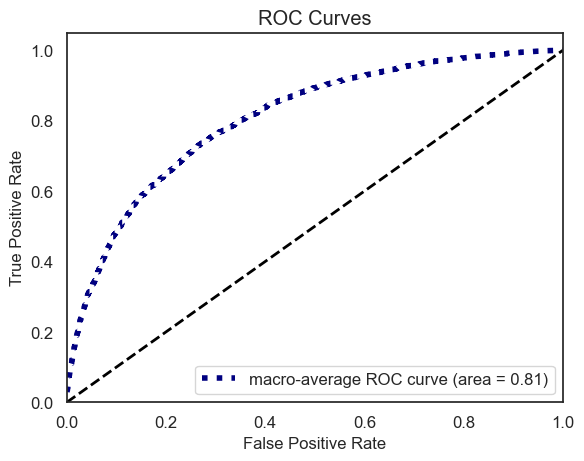

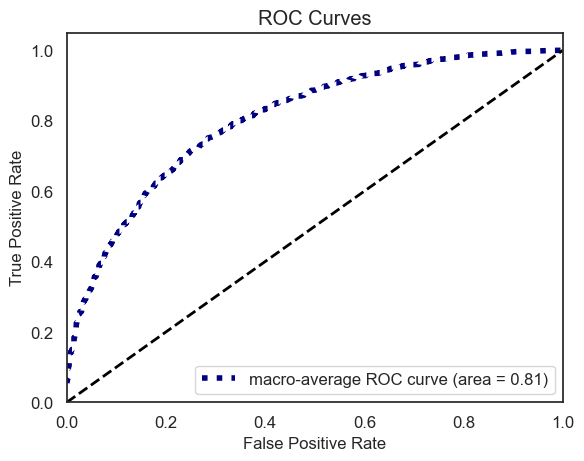

In [179]:
plot_roc_curve( y_true = Yt[tgt] , y_probas = mlog_reg.predict_proba( Xt[varw] ) , curves = 'macro' )
plot_roc_curve( y_true = Yv[tgt] , y_probas = mlog_reg.predict_proba( Xv[varw] ) , curves = 'macro' )

In [ ]:
optb.status

In [ ]:
optb2.status

In [ ]:
iv_dict = {'Variable': var_con, 'IV': iv_list_con}
iv_df_con = pd.DataFrame.from_dict(iv_dict)
iv_df_con = iv_df_con.sort_values(by = 'IV', ascending=False)
iv_df_con

In [ ]:
iv_dict2 = {'Variable': var_cat, 'IV': iv_list_cat}
iv_df_cat = pd.DataFrame.from_dict(iv_dict2)
iv_df_cat = iv_df_cat.sort_values(by = 'IV', ascending=False)
iv_df_cat

#### 5.1 Identificación de mejores variables predictivas

In [ ]:
iv_df_con.loc[(iv_df_con['rankeo'] == 3) | (iv_df_con['rankeo'] == 4)].reset_index(drop=True)

In [ ]:
iv_df_con['id'] = iv_df_con.apply(lambda x: 0 if x['rankeo'] < 3 or x['rankeo'] == 5 else 1, axis = 1)
iv_df_con

In [ ]:
iv_df_cat = iv_df_cat.loc[(iv_df_cat['rankeo'] == 3) | (iv_df_cat['rankeo'] == 4)].reset_index(drop = True)
iv_df_cat['raiz'] = iv_df_cat['Variable'].map( lambda x: '_'.join(x.split('_')[1:2] ) )
iv_df_cat = iv_df_cat.sort_values(by = ['raiz','IV'],ascending = [1,0]).reset_index(drop = True)
iv_df_cat['id'] = iv_df_cat.groupby('raiz').cumcount() + 1
iv_df_cat

In [ ]:
iv_df_con2 = iv_df_con.loc[iv_df_con.id == 1]
iv_df_con2

In [ ]:
iv_df_cat2 = iv_df_cat.loc[iv_df_cat.id == 1]
iv_df_cat2

#### 5.2 Mejores variables predictivas

In [ ]:
best_var_con = iv_df_con2['Variable'].tolist()
best_var_cat = iv_df_cat2['Variable'].tolist()
best_var = best_var_con + best_var_cat 
len(best_var) , best_var

#### 5.3 Segunda partición de los datos tomando en cuenta la mejores variables predictivas

In [ ]:
Xt_final = Xt[best_var].copy()
Xv_final = Xv[best_var].copy()

In [ ]:
Xt_final.shape, Xv_final.shape, Yt.shape[0], Yv.shape[0]

In [ ]:
Yt.head()

In [ ]:
Xt_final.info()

#### 6.0 Transformación WOE

#### 6.1 Codificación / Diccionario / Mapa WoE

In [ ]:
binning_process = BinningProcess(best_var)

In [ ]:
# replacing values of variables with woe
Xt_woe = binning_process.fit_transform(Xt_final,Yt)
Xv_woe = binning_process.fit_transform(Xv_final,Yv)

In [ ]:
#def codificacion_woe(df, v, tgt):
#    aux = df.pivot_table( index=v,
#                          columns=tgt,
#                          values=um[0],
#                          aggfunc='count',
#                          fill_value=0)

#    aux[list( range(2) )] = aux / aux.apply(np.sum)

#    aux['w'] = np.log( aux[0] / aux[1] )

#    aux.drop(range(2) , axis=1 , inplace=True )

#    aux = aux.to_dict()['w']
    
#    return v, aux

In [ ]:
mapa_woe = list( map(  lambda v: codificacion_woe( Xt , v , tgt  ) , best_var  ) )

In [ ]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [ ]:
print(Xt.shape, Xv.shape, Yt.shape[0], Yv.shape[0])

In [ ]:
var_woe = Xt.filter(like='w_').columns.tolist()
var_woe

In [ ]:
Xt[var_woe].corr()

In [ ]:
# w_d_avg_bureau_score_6m_2 sale de la lista de variables debido a la alta correlacion con la variable
# w_d_avg_bureau_score_2 
del var_woe[7]
var_woe

In [ ]:
# se encontraron dos valores con valor infinito, se eliminaron de 
pd.set_option('display.max_columns',None)

Xt.loc[Xt.loc[:, 'w_num_ccj'] == np.inf]

In [ ]:
Yt.loc[Yt.loc[:, 'id'] == 6526999]

In [ ]:
Yt.loc[Yt.loc[:, 'id'] == 1041048]

In [ ]:
# se indentificaron que son los registros  con id '6526999','1041048' y se eliminan de Xt
Xt.drop(Xt[Xt['id'] == 6526999].index, inplace = True)

In [ ]:
# se indentificaron que son los registros '6526999','1041048' y se eliminan de la Xt
Xt.drop(Xt[Xt['id'] == 1041048].index, inplace = True)

In [ ]:
# se indentificaron que son los registros '6526999','1041048' y se eliminan de la target
Yt.drop(Yt[Yt['id'] == 6526999].index, inplace = True)
Yt.drop(Yt[Yt['id'] == 1041048].index, inplace = True)

In [ ]:
tad1 = Xt[um + var_woe].merge(Yt , on = um , how='inner')

In [ ]:
tad1.head()

#### Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Entrenamiento

In [ ]:
tad1 = Xt[um + var_woe].merge(Yt , on = um , how='inner')

In [ ]:
m_reg_log = LogisticRegression()

In [ ]:
m_reg_log.fit( Xt[var_woe] , Yt[tgt] )

In [ ]:
m_reg_log.intercept_

In [ ]:
m_reg_log.coef_

In [ ]:
Xv.loc[Xv.loc[:, 'w_num_ccj'] == np.inf]

In [ ]:
Yv.loc[Yv.loc[:, 'id'] == 2610320]

In [ ]:
Yv.drop(Yv[Yv['id'] == 2610320].index, inplace = True)
Xv.drop(Xv[Xv['id'] == 2610320].index, inplace = True)

In [ ]:
pd.DataFrame(m_reg_log.predict_proba(Xv[var_woe]))

In [ ]:
pd.DataFrame(m_reg_log.predict(Xv[var_woe])).value_counts()

In [ ]:
Yv[tgt].value_counts()

In [ ]:
rest_v = m_reg_log.predict(Xv[var_woe])

In [ ]:
unique , counts = np.unique( rest_v , return_counts=True )

In [ ]:
dict(zip( unique , counts  ))

#### Evaluación

In [ ]:
from scikitplot.metrics import plot_roc_curve

In [ ]:
plot_roc_curve( y_true = Yt[tgt] , y_probas = m_reg_log.predict_proba( Xt[var_woe] ) , curves = 'macro' )
plot_roc_curve( y_true = Yv[tgt] , y_probas = m_reg_log.predict_proba( Xv[var_woe] ) , curves = 'macro' )

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [ ]:
def metricas(model,Xt,Xv,yt,yv):
    print(' Métricas para modelo de clasificación: \n')

    print(' Valor ROC train : %.3f'   %roc_auc_score( y_score = model.predict_proba(Xt)[:,1] , y_true = yt  )   )

    print(' Valor ROC validate : %.3f'   %roc_auc_score( y_score = model.predict_proba(Xv)[:,1] , y_true = yv  )   )

    print(' Valor ACC : %.3f\n' %accuracy_score( y_pred = model.predict(Xv) , y_true = yv) )

    print(' Matriz de confusión: ', '\n', confusion_matrix(y_pred = model.predict(Xv) , y_true = yv ) )

In [ ]:
metricas( m_reg_log,Xt[var_woe] ,Xv[var_woe], Yt[tgt], Yv[tgt])

#### Transformación Scoring

In [ ]:
PDO = 30
base_score = 700
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log(base_odds)

print(factor, offset)

In [ ]:
betas = m_reg_log.coef_[0].tolist()
beta0 = m_reg_log.intercept_[0]

In [ ]:
betas , beta0

In [ ]:
n = len(betas)
n

In [ ]:
for v, beta in zip( var_woe , betas ):
    print(v, beta)
    
    Xt[f'p_{v}'] = np.ceil( (-Xt[v] * beta + beta0/ n ) * factor + offset / n )
    Xv[f'p_{v}'] = np.ceil( (-Xv[v] * beta + beta0/ n ) * factor + offset / n )

In [ ]:
Xt.head(1)

In [ ]:
var_puntos = [c for c in Xv.columns.tolist() if c[:2] == 'p_']
var_puntos

In [ ]:
Xt['score'] = Xt[var_puntos].sum(axis=1)
Xv['score'] = Xv[var_puntos].sum(axis=1)

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(Xt['score'], hist = True)
sns.distplot(Xv['score'], hist = True)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
# y_pred_prob = rest_v[:,1]
rest_v

In [ ]:
precision, recall, threshold = precision_recall_curve(Yv[tgt], rest_v)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
#Yv[tgt]

In [ ]:
# a mano
# precision
# 0.952052
# recall
# 0.994603

# A model with high precision and recall will return very few results, but most of the predictions are correct.
# However, a model with low precision and high recall return many results, but most of the predictions will be incorrect. 
# An Ideal model will have high precision and high recall and will return many results with all correctly predicted, 
# while a baseline model will have very low precision.

In [ ]:
# curva de precision and recall
# cómo saber si los datos están desbalanceados?